In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('train_Data.csv')
train_df.head(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10 00:00:00,2016-01-15 00:00:00,2012-02-10 00:00:00,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31 00:00:00,2016-02-15 00:00:00,2012-03-31 00:00:00,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17 00:00:00,2023-02-10 00:00:00,2017-06-17 00:00:00,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29 00:00:00,2017-11-10 00:00:00,2013-11-29 00:00:00,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08 00:00:00,2015-07-05 00:00:00,2011-12-08 00:00:00,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,2011-12-19 00:00:00,2015-12-15 00:00:00,2011-12-19 00:00:00,3413012,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,2011-12-31 00:00:00,2015-12-05 00:00:00,2011-12-31 00:00:00,3553579,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
7,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,360000.0,11000.0,2012-02-09 00:00:00,2016-02-15 00:00:00,2012-02-09 00:00:00,4008234,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service
8,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,400000.0,50000.0,2012-03-29 00:00:00,2016-01-15 00:00:00,2012-03-29 00:00:00,4603217,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service
9,13,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,490000.0,10000.0,2012-03-30 00:00:00,2016-02-15 00:00:00,2012-03-30 00:00:00,4619836,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,No Top-up Service


In [6]:
train_df['PaymentMode'].value_counts()

Direct Debit    31766
ECS             31390
PDC             26617
Billed          26486
PDC_E            9937
Auto Debit        843
SI Reject         744
Cheque            442
ECS Reject        417
Escrow              7
PDC Reject          6
Name: PaymentMode, dtype: int64

In [9]:
train_df['Frequency'].value_counts()

Half Yearly    76248
Monthly        31150
Quatrly        20795
BI-Monthly       462
Name: Frequency, dtype: int64

In [3]:
test_df=pd.read_excel("test_Data.xlsx")
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,419616.0,14723.0,2012-02-29,2015-02-10,2012-02-29,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,280000.0,25350.0,2013-07-25,2014-08-10,2013-07-26,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               128655 non-null  int64  
 1   Frequency        128655 non-null  object 
 2   InstlmentMode    128655 non-null  object 
 3   LoanStatus       128655 non-null  object 
 4   PaymentMode      128655 non-null  object 
 5   BranchID         128655 non-null  int64  
 6   Area             117002 non-null  object 
 7   Tenure           128655 non-null  int64  
 8   AssetCost        128655 non-null  int64  
 9   AmountFinance    128655 non-null  float64
 10  DisbursalAmount  128655 non-null  float64
 11  EMI              128655 non-null  float64
 12  DisbursalDate    128655 non-null  object 
 13  MaturityDAte     128654 non-null  object 
 14  AuthDate         128655 non-null  object 
 15  AssetID          128655 non-null  int64  
 16  ManufacturerID   128655 non-null  int6

In [5]:
train_df.shape

(128655, 26)

In [6]:
#df['train'].fillna(0,inplace=True)
#df['test'].fillna(0,inplace=True)

In [7]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [8]:
train_df.drop(['Area','City','AuthDate'],axis=1,inplace=True)
test_df.drop(['Area','City','AuthDate'],axis=1,inplace=True)

In [9]:
import datetime
train_df['DisbursalDate']=pd.to_datetime(train_df['DisbursalDate'],errors='coerce')
train_df['MaturityDAte']=pd.to_datetime(train_df['MaturityDAte'],errors='coerce')

In [10]:
train_df.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         1
AssetID              0
ManufacturerID       0
SupplierID           0
LTV                  0
SEX                 59
AGE                 59
MonthlyIncome      234
State                0
ZiPCODE            372
Top-up Month         0
dtype: int64

In [11]:
train_df[train_df['MaturityDAte'].isnull()]

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
53392,57606,Monthly,Arrear,Closed,Billed,263,45,495000,400000.0,400000.0,0.0,2013-03-15,NaT,9510810,1046,55150,80.81,M,43.0,41666.67,MADHYA PRADESH,458880.0,No Top-up Service


In [12]:
train_df['MaturityDAte'].fillna((train_df.MaturityDAte + pd.DateOffset(months=45)),inplace=True)
train_df['SEX'].fillna(train_df['SEX'].mode()[0],inplace=True)
train_df['AGE'].fillna(train_df['AGE'].mean(),inplace=True)
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(),inplace=True)
train_df['ZiPCODE'].fillna(train_df['ZiPCODE'].mode()[0],inplace=True)

In [13]:
test_df.isnull().sum()

ID                  0
Frequency           0
InstlmentMode       0
LoanStatus          0
PaymentMode         0
BranchID            0
Tenure              0
AssetCost           0
AmountFinance       0
DisbursalAmount     0
EMI                 0
DisbursalDate       0
MaturityDAte        0
AssetID             0
ManufacturerID      2
SupplierID          0
LTV                 0
SEX                 5
AGE                 7
MonthlyIncome      14
State               0
ZiPCODE             1
dtype: int64

In [14]:
test_df['ManufacturerID'].fillna(test_df['ManufacturerID'].mode()[0],inplace=True)
test_df['SEX'].fillna(test_df['SEX'].mode()[0],inplace=True)
test_df['AGE'].fillna(test_df['AGE'].mean(),inplace=True)
test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].median(),inplace=True)
test_df['ZiPCODE'].fillna(test_df['ZiPCODE'].mode()[0],inplace=True)

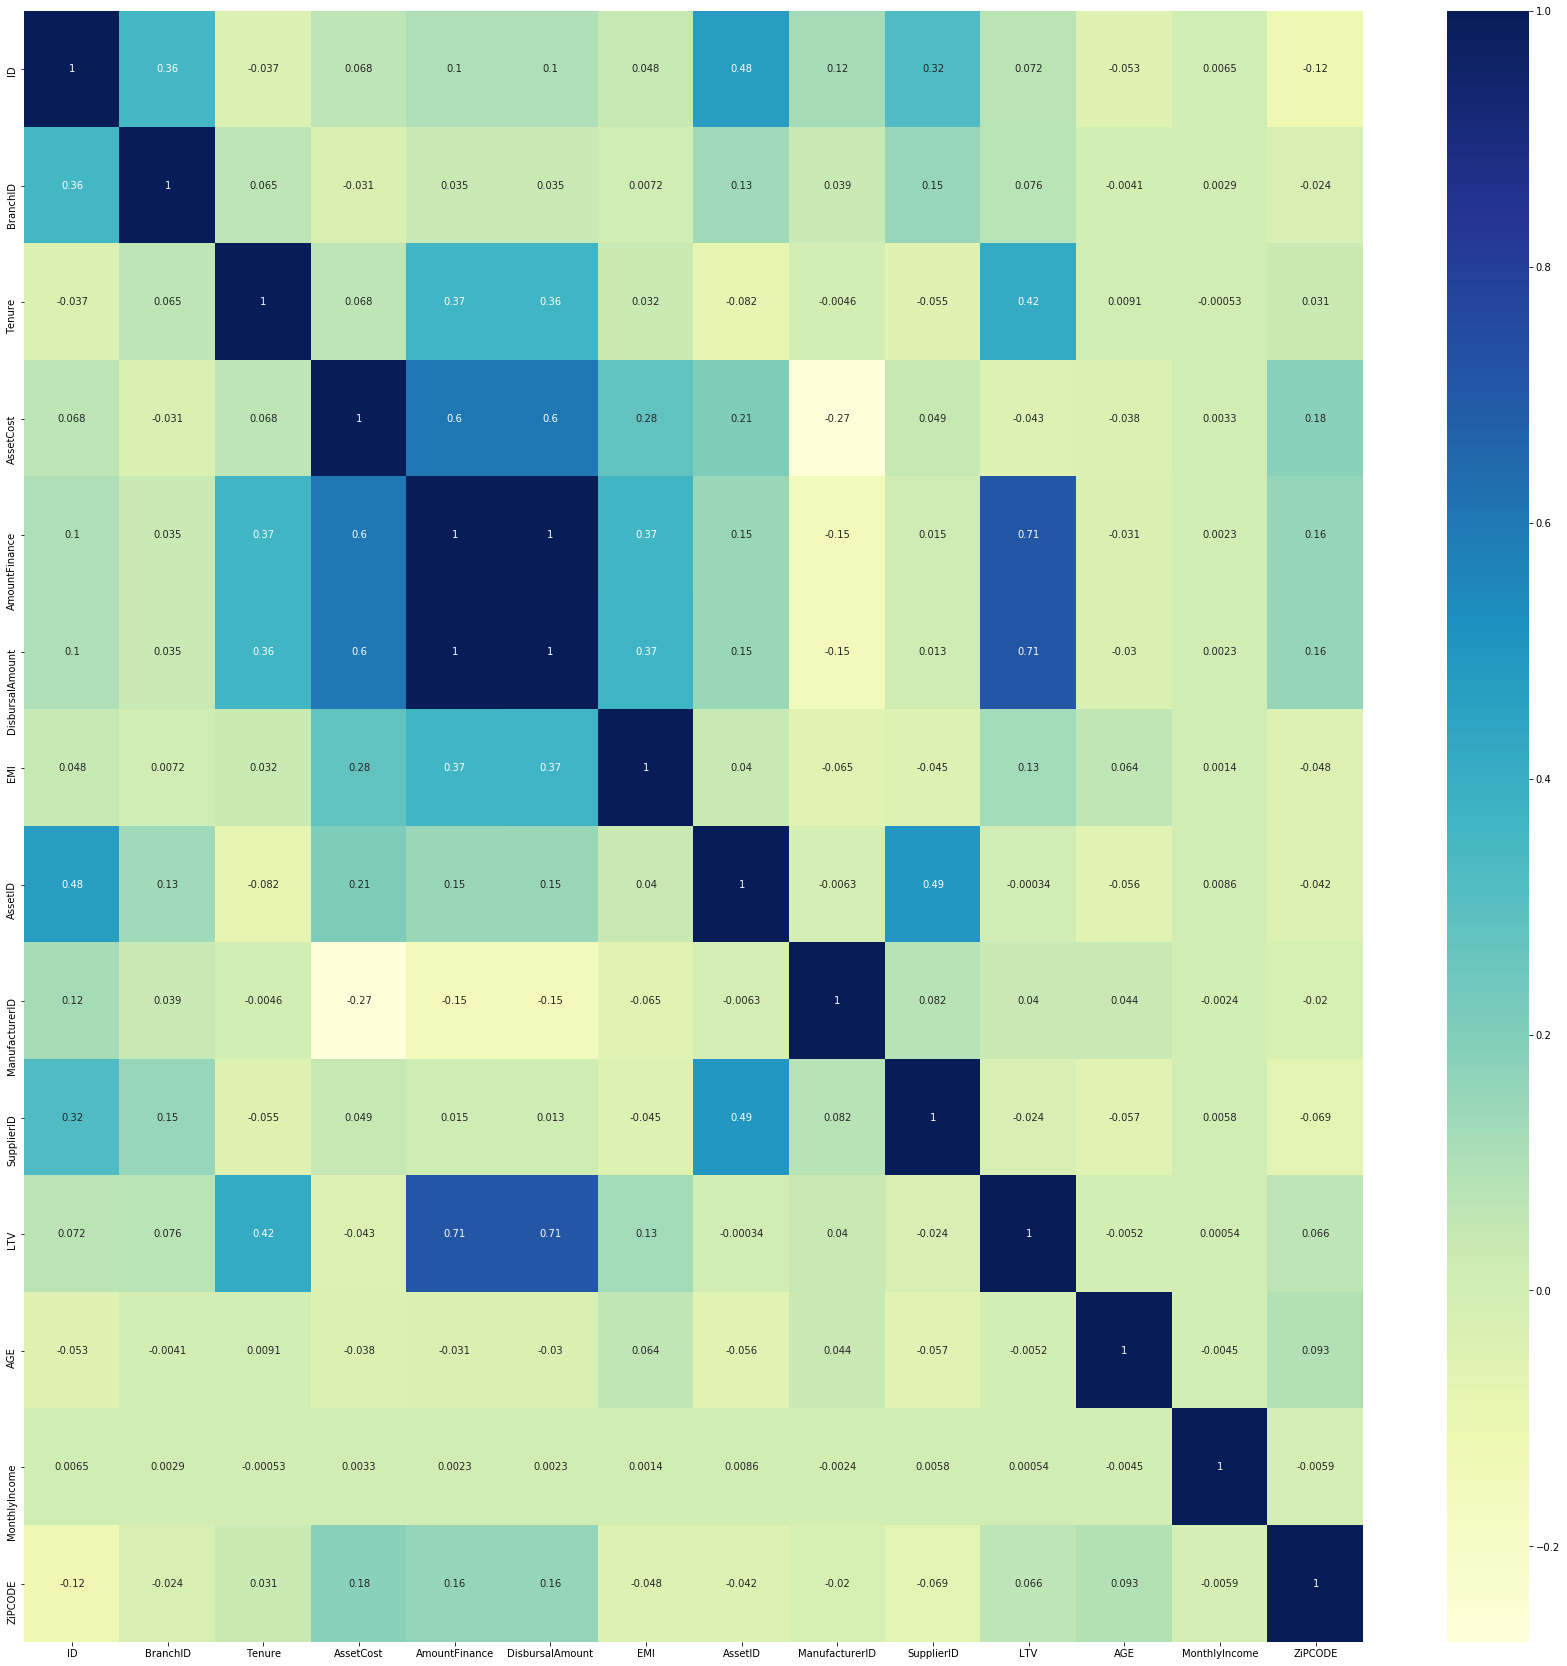

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

From the above we can see that the AccountFinance and DisbursedAmount is highly correlated with eachother, so we need to drop one of the features, and asset cost is also highly correlated as amount should be near equal to asset.

In [16]:
train_df.drop(['AmountFinance'],axis=1,inplace=True)
test_df.drop(['AmountFinance'],axis=1,inplace=True)

In [17]:
train_df['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [54]:
from sklearn.preprocessing import KBinsDiscretizer
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
train_df['Age_Bins'] =age_discretizer.fit_transform(train_df['AGE'].values.reshape(-1,1)).astype(int)
emi_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
train_df['EMI_Bins']=emi_discretizer.fit_transform(train_df['EMI'].values.reshape(-1,1)).astype(int)
tenure_discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')
train_df['Tenure_bins']=tenure_discretizer.fit_transform(train_df['Tenure'].values.reshape(-1,1)).astype(int)
income_discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
train_df['income_bins']=tenure_discretizer.fit_transform(train_df['MonthlyIncome'].values.reshape(-1,1)).astype(int)

In [55]:
train_df[['Age_Bins','EMI_Bins','Tenure_bins','income_bins']]

,Age_Bins,EMI_Bins,Tenure_bins,income_bins
0,7,1,3,3
1,0,0,2,0
2,4,3,4,4
3,0,0,3,1
4,8,1,2,1
...,...,...,...,...
128650,0,8,1,5
128651,0,8,1,5
128652,4,1,0,5
128653,4,7,1,5


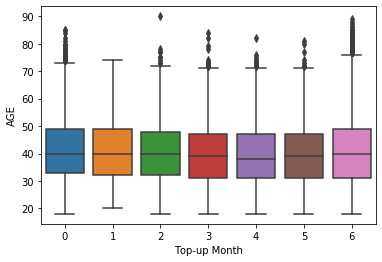

In [59]:
sns.boxplot(train_df['Top-up Month'],train_df['AGE'])

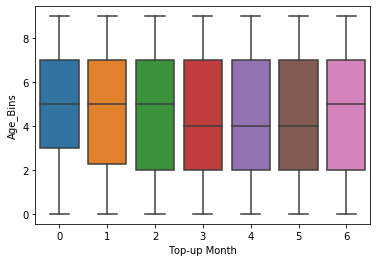

In [60]:
sns.boxplot(train_df['Top-up Month'],train_df['Age_Bins'])

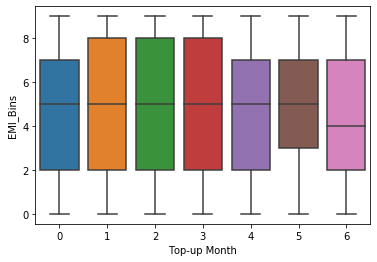

In [61]:
sns.boxplot(train_df['Top-up Month'],train_df['EMI_Bins'])

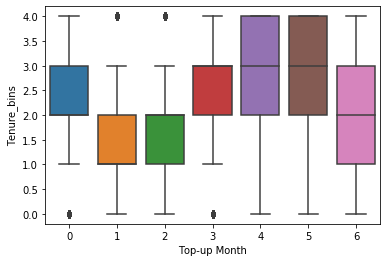

In [62]:
sns.boxplot(train_df['Top-up Month'],train_df['Tenure_bins'])

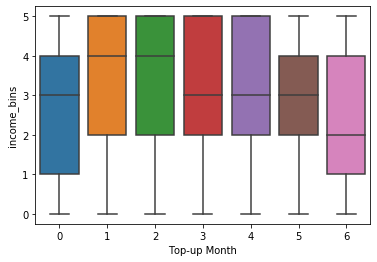

In [63]:
sns.boxplot(train_df['Top-up Month'],train_df['income_bins'])

In [18]:
    from sklearn.preprocessing import LabelEncoder
cat_col_mask=['Frequency','InstlmentMode','LoanStatus','PaymentMode','State','SEX']
label=['Top-up Month']
le=LabelEncoder()
for col in cat_col_mask:
    le.fit(train_df[col].unique().tolist() + test_df[col].unique().tolist())
    train_df[col]=le.transform(train_df[col])
    test_df[col]=le.transform(test_df[col])
train_df[label]=le.fit_transform(train_df[label])

In [19]:
train_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,2012-02-10,2016-01-15,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,2012-03-31,2016-02-15,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,2017-06-17,2023-02-10,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,2013-11-29,2017-11-10,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,2011-12-08,2015-07-05,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5


### Creating Features from Feature Engineering

In [20]:
train_df1=pd.read_csv("train_bureau.csv")
train_df1.head(10)

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,2018-02-27 00:00:00,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,NaN,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,NaN,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
5,1,False,PRIMARY,Credit Card,NAB,2018-04-30 00:00:00,Individual,Closed,2018-01-11 00:00:00,2018-03-13 00:00:00,NaN,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,"20180331,20180228,20180131,",000000000,"24650,17300,0,",",,,",",,,,",NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000000000000000000000000000,"443769,448365,453134,457687,462320,466802,4712...",",,,,,,,,,,,,,,",",,,,,,,,,,,,,,",84.0
7,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-01-30 00:00:00,2017-09-21 00:00:00,NaN,NaN,"5,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0000000000000870540270270000320000000000...,"0,,0,0,0,0,0,0,0,13060,13060,25982,38767,51417...","0,,0,0,0,0,3064,3064,3064,2972,0,2802,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
8,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-07-31 00:00:00,Individual,Closed,2013-06-11 00:00:00,2017-07-01 00:00:00,NaN,NaN,"4,00,000",NaN,0,NaN,0,0.0,NaN,"20170731,20170601,20170531,20170430,20170331,2...",000DDD0220210220190220220000270000000000000000...,"0,,0,10487,20862,31126,41281,51328,51328,71101...","0,,1722,1722,1722,1722,1722,1722,0,1625,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
9,2,False,PRIMARY,Overdraft,PRB,2017-03-31 00:00:00,Individual,Closed,2016-01-15 00:00:00,2017-03-27 00:00:00,2017-03-27 00:00:00,NaN,"17,00,000",NaN,0,NaN,0,0.0,NaN,"20170331,20170201,20170101,20161231,20161101,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,1699997,,,154997,,,-3,,,149997,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [21]:
import datetime
def preprocess(df):
    df.dropna(subset=['DISBURSED-DT','REPORTED DATE - HIST'], how='all',inplace=True)
    df.sort_values(['DISBURSED-DT'],inplace=True)
    df['diff']=df.groupby('ID')['DISBURSED-DT'].diff().fillna(pd.Timedelta(seconds=0))
    df['diff_months']=df['diff'].astype('timedelta64[M]')
    bins=[0,12,24,36,48,60,72,84,96,108]
    groups=df.groupby(['ID',pd.cut(df.diff_months,bins)])
    stacked=groups.size().unstack()
    df['DISBURSED-AMT/HIGH CREDIT'].fillna('0',inplace=True)
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].str.replace(',','')
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].astype('int')
    df['CURRENT-BAL'].fillna('0',inplace=True)
    df['CURRENT-BAL']=df['CURRENT-BAL'].str.replace(',','')
    df['CURRENT-BAL']=df['CURRENT-BAL'].astype('int')
        total3=df.groupby('ID').agg({'DISBURSED-AMT/HIGH CREDIT':['sum'],'DISBURSED-DT':['count'], 'CURRENT-BAL': 'sum'}).reset_index()
    total3.columns = total3.columns.droplevel(1)
    total3.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'Totalloanamount','DISBURSED-DT':'Totalloancount','CURRENT-BAL':'Totaloverdue'}, inplace=True)
    total1=df.groupby(by='ID',as_index=False)['DISBURSED-AMT/HIGH CREDIT','CURRENT-BAL','diff_months'].mean()
    total1.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'AvgCredit','CURRENT-BAL':'AvgOverdue','diff_months':'Avgdisbursal'},inplace=True)
    total1=total1.merge(total3, on='ID', how='inner')
    total2=total1.merge(stacked, on='ID', how='inner')
    return total2

In [22]:
train_df1['DISBURSED-DT']=train_df1['DISBURSED-DT'].str.split(" ").str[0]
train_df1['DISBURSED-DT'].fillna(train_df1['REPORTED DATE - HIST'].str.rsplit(',').str[-2],inplace=True)
train_df1['DISBURSED-DT']=pd.to_datetime(train_df1['DISBURSED-DT'],errors='coerce')
train_df2=preprocess(train_df1)
train_df2.head(10)

,ID,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,1,2.445947e+05,68725.111111,9.666667,2201352,9,618526,6,1,1,0,0,0,0,0,0
1,2,1.393622e+06,796112.076923,6.538462,18117081,13,10349457,6,2,0,0,0,0,0,0,0
2,3,1.196248e+05,66618.225806,4.290323,3708369,31,2065165,19,2,2,0,0,0,0,0,0
3,7,3.181382e+05,156000.000000,14.750000,1272553,4,624000,2,0,0,0,1,0,0,0,0
4,8,2.893166e+05,139159.857143,12.285714,2025216,7,974119,1,1,2,0,0,0,0,0,0
5,9,2.800000e+05,0.000000,0.000000,280000,1,0,0,0,0,0,0,0,0,0,0
6,10,3.880893e+05,94574.333333,25.666667,1164268,3,283723,0,1,0,0,1,0,0,0,0
7,11,4.342814e+05,157069.600000,4.560000,10857036,25,3926740,14,3,0,0,0,0,0,0,0
8,12,4.000000e+05,0.000000,0.000000,400000,1,0,0,0,0,0,0,0,0,0,0
9,13,5.075000e+05,0.000000,12.500000,1015000,2,0,0,0,1,0,0,0,0,0,0


In [23]:
train_df12=train_df.merge(train_df2, on='ID', how='inner')
train_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,2012-02-10,2016-01-15,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0,2.445947e+05,68725.111111,9.666667,2201352,9,618526,6,1,1,0,0,0,0,0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,2012-03-31,2016-02-15,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6,1.393622e+06,796112.076923,6.538462,18117081,13,10349457,6,2,0,0,0,0,0,0,0
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,2017-06-17,2023-02-10,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1,1.196248e+05,66618.225806,4.290323,3708369,31,2065165,19,2,2,0,0,0,0,0,0
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,2013-11-29,2017-11-10,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0,3.181382e+05,156000.000000,14.750000,1272553,4,624000,2,0,0,0,1,0,0,0,0
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,2011-12-08,2015-07-05,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5,2.893166e+05,139159.857143,12.285714,2025216,7,974119,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,1,1,1,3,424,24,470000,265601.0,76800.0,2018-09-21,2020-06-05,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,3,1.043800e+06,933815.000000,5.500000,2087601,2,1867630,1,0,0,0,0,0,0,0,0
128651,143391,1,1,1,3,424,24,460000,275630.0,80100.0,2018-09-22,2020-06-05,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,6,2.756300e+05,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0,0,0
128652,143393,2,1,0,3,424,23,545000,300733.0,15277.0,2018-11-23,2020-11-05,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,6,1.761380e+05,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0,0,0
128653,143394,1,1,0,3,424,35,350000,250962.0,74341.0,2018-12-20,2021-06-05,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,6,2.506430e+05,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0,0,0


In [24]:
train_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
DisbursalDate      0
MaturityDAte       1
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
Top-up Month       0
AvgCredit          0
AvgOverdue         0
Avgdisbursal       0
Totalloanamount    0
Totalloancount     0
Totaloverdue       0
(0, 12]            0
(12, 24]           0
(24, 36]           0
(36, 48]           0
(48, 60]           0
(60, 72]           0
(72, 84]           0
(84, 96]           0
(96, 108]          0
dtype: int64

In [25]:
test_df1=pd.read_excel('test_bureau.xlsx')
test_df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,NaT,"10,000",588,NaN,589,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,2019-10-15,NaN,"25,00,000","30,797/Monthly","21,07,227",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,2019-10-15,NaN,"99,000","1,223/Monthly","83,458",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,NaT,NaN,"3,65,000",NaN,0,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,2017-06-15,NaN,"25,801",NaN,0,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64014,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"12,30,000",NaN,"2,04,173",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"204173,243754,282926,321694,360063,398035,4356...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","42120,42120,42120,42120,42120,42120,42120,4212...",NaN
64015,143400,False,PRIMARY,Commercial Vehicle Loan,PRB,2018-02-28,Joint,Closed,2015-05-16,2018-02-24 00:00:00,2018-02-24,NaN,"20,00,000",NaN,0,NaN,0,0.0,Standard,"20180228,20180131,20171231,20171130,20171031,2...",0000000000000000000000000000000000000000000000...,"0,0,0,0,0,0,0,0,0,0,0,100494,200014,298570,396...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1796,0,0,0,0,0,0,0,0,0,101475,101475,101475,10...",NaN
64016,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"10,80,000",NaN,"1,79,276",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"179276,214030,248425,282466,316155,349498,3824...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","36984,36984,36984,36984,36984,36984,36984,3698...",NaN
64017,143400,True,PRIMARY,Tractor Loan,NBF,2014-08-31,Individual,Closed,2013-05-28,2014-08-31 00:00:00,NaT,NaN,"3,10,000",NaN,0,NaN,0,0.0,NaN,"20140831,20140731,20140630,20140531,20140430,2...",000000000000000000000000000000000000000000000000,"0,0,0,27840,55324,82457,109244,135689,161796,1...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",",,,,,,,,,,,,,,,,,",NaN


In [26]:
test_df1.isnull().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                    0
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                    44
CLOSE-DT                     31453
LAST-PAYMENT-DATE            32550
CREDIT-LIMIT/SANC AMT        62421
DISBURSED-AMT/HIGH CREDIT       38
INSTALLMENT-AMT              47693
CURRENT-BAL                     32
INSTALLMENT-FREQUENCY        48243
OVERDUE-AMT                  13127
WRITE-OFF-AMT                 2561
ASSET_CLASS                  34902
REPORTED DATE - HIST          2561
DPD - HIST                    2565
CUR BAL - HIST                2561
AMT OVERDUE - HIST            2561
AMT PAID - HIST               2672
TENURE                       42882
dtype: int64

In [27]:
test_df2=preprocess(test_df1)
test_df2

,ID,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,4,7.411470e+05,5.478185e+05,22.750000,2964588,4,2191274,0,0,1,0,0,1,0,0,0
1,5,2.424766e+05,1.134039e+05,9.375000,1939813,8,907231,5,1,1,0,0,0,0,0,0
2,6,2.697801e+05,8.566667e+03,8.583333,3237361,12,102800,4,3,1,0,0,0,0,0,0
3,25,4.000000e+05,6.379650e+04,7.500000,800000,2,127593,0,1,0,0,0,0,0,0,0
4,119,4.650000e+05,5.810000e+04,23.000000,930000,2,116200,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,1.292226e+06,3.140004e+05,2.974359,50396799,39,12246016,10,2,1,0,0,0,0,0,0
14741,143397,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14742,143398,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14743,143399,8.232919e+05,4.599900e+04,5.312500,13172671,16,735984,5,1,1,0,0,0,0,0,0


In [28]:
test_df12=test_df.merge(test_df2, on='ID', how='inner')
test_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,4,2,0,1,9,2,46,480000,365000.0,1000.0,2011-12-29,2015-10-05,3524747,1046.0,22354,75.83,1,50.00000,32069.00,12,473001.0,7.411470e+05,5.478185e+05,22.750000,2964588,4,2191274,0,0,1,0,0,1,0,0,0
1,5,2,0,1,7,2,45,480000,285000.0,9300.0,2012-04-28,2016-01-01,4985862,1046.0,22354,57.44,1,35.00000,25000.00,12,473001.0,2.424766e+05,1.134039e+05,9.375000,1939813,8,907231,5,1,1,0,0,0,0,0,0
2,6,3,1,1,7,2,48,580000,400000.0,35800.0,2013-10-22,2017-09-10,12881783,1060.0,65929,68.97,1,37.00000,23333.33,12,473001.0,2.697801e+05,8.566667e+03,8.583333,3237361,12,102800,4,3,1,0,0,0,0,0,0
3,25,1,1,1,1,154,36,725000,500000.0,52000.0,2013-05-21,2016-02-10,10613776,1049.0,68597,61.79,1,55.00000,91666.67,4,493558.0,4.000000e+05,6.379650e+04,7.500000,800000,2,127593,0,1,0,0,0,0,0,0,0
4,119,3,1,1,7,194,48,617000,400000.0,35400.0,2012-11-30,2016-12-05,7911110,1049.0,38493,59.09,1,48.00000,12500.00,14,754137.0,4.650000e+05,5.810000e+04,23.000000,930000,2,116200,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,2,1,1,7,143,35,530016,419616.0,14723.0,2012-02-29,2015-02-10,4276747,1046.0,22094,79.17,1,40.23436,33333.33,8,122001.0,1.292226e+06,3.140004e+05,2.974359,50396799,39,12246016,10,2,1,0,0,0,0,0,0
14741,143397,2,1,1,7,32,36,595000,446500.0,15491.0,2012-04-10,2015-04-05,4746586,2721.0,61196,75.04,1,40.23436,33333.33,11,560020.0,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14742,143398,2,1,1,7,32,36,595000,446500.0,15491.0,2012-04-10,2015-04-05,4746588,2721.0,61196,75.04,1,40.23436,33333.33,11,560020.0,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14743,143399,2,1,1,9,246,12,400000,280000.0,25350.0,2013-07-25,2014-08-10,11719081,1046.0,63565,70.00,1,40.23436,33333.33,16,335001.0,8.232919e+05,4.599900e+04,5.312500,13172671,16,735984,5,1,1,0,0,0,0,0,0


In [29]:
test_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
DisbursalDate      0
MaturityDAte       0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
AvgCredit          0
AvgOverdue         0
Avgdisbursal       0
Totalloanamount    0
Totalloancount     0
Totaloverdue       0
(0, 12]            0
(12, 24]           0
(24, 36]           0
(36, 48]           0
(48, 60]           0
(60, 72]           0
(72, 84]           0
(84, 96]           0
(96, 108]          0
dtype: int64

In [30]:
x=train_df12.drop(['Top-up Month','DisbursalDate','MaturityDAte','ID'],axis=1)
x

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,2.445947e+05,68725.111111,9.666667,2201352,9,618526,6,1,1,0,0,0,0,0,0
1,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,1.393622e+06,796112.076923,6.538462,18117081,13,10349457,6,2,0,0,0,0,0,0,0
2,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1.196248e+05,66618.225806,4.290323,3708369,31,2065165,19,2,2,0,0,0,0,0,0
3,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,3.181382e+05,156000.000000,14.750000,1272553,4,624000,2,0,0,0,1,0,0,0,0
4,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,2.893166e+05,139159.857143,12.285714,2025216,7,974119,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,1,1,1,3,424,24,470000,265601.0,76800.0,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,1.043800e+06,933815.000000,5.500000,2087601,2,1867630,1,0,0,0,0,0,0,0,0
128651,1,1,1,3,424,24,460000,275630.0,80100.0,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,2.756300e+05,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0,0,0
128652,2,1,0,3,424,23,545000,300733.0,15277.0,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,1.761380e+05,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0,0,0
128653,1,1,0,3,424,35,350000,250962.0,74341.0,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,2.506430e+05,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0,0,0


In [31]:
y=train_df12['Top-up Month']
y

0         0
1         6
2         1
3         0
4         5
         ..
128650    3
128651    6
128652    6
128653    6
128654    6
Name: Top-up Month, Length: 128655, dtype: int32

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45,shuffle=True,stratify=y)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((90058, 33), (38597, 33), (90058,), (38597,))

In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = []
precision = []
recall = []
f1_score = []

def calculate_metrics(y_test,y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred,pos_label='positive',average='macro')
    
    accuracy.append(acc)
    f1_score.append(f1)
    
kfold_mean=[]
kfold_max=[]

def calculate_kfold(estimator):
    accuracies = cross_val_score(estimator,x,y, cv=10)
    kfold_mean.append(accuracies.mean())
    kfold_max.append(accuracies.max())

In [36]:
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
lgbmpred=lgbm.predict(x_test)
calculate_metrics(y_test, lgbmpred)
calculate_kfold(lgbm)

In [37]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)
xgbcpred=xgbc.predict(x_test)
calculate_metrics(y_test, xgbcpred)
calculate_kfold(xgbc)

from sklearn.SVM import LinearSVC
svclgbm=LGBMClassifier(n_estimators=1000, base_estimator=LinearSVC() ,learning_rate=0.2, algorithm = "SAMME")
svclgbm.fit(x_train,y_train)
svclgbmpred=svclgbm.predict(x_test)
calculate_metrics(y_test, svclgbmpred)
calculate_kfold(svclgbm)

from sklearn.ensemble import RandomForestClassifier
RFClgbm=LGBMClassifier(n_estimators=1000, base_estimator=RandomForestClassifier() ,learning_rate=0.2)
RFClgbm.fit(x_train,y_train)
RFClgbmpred=RFClgbm.predict(x_test)
calculate_metrics(y_test, RFClgbmpred)
calculate_kfold(RFClgbm)

In [38]:
from catboost import CatBoostClassifier
catbost=CatBoostClassifier()
catbost.fit(x_train,y_train)
catboostpred=catbost.predict(x_test)
calculate_metrics(y_test, catboostpred)
calculate_kfold(catbost)

Learning rate set to 0.099541
0:	learn: 1.5674846	total: 179ms	remaining: 2m 58s
1:	learn: 1.3583410	total: 286ms	remaining: 2m 22s
2:	learn: 1.2166313	total: 400ms	remaining: 2m 12s
3:	learn: 1.1132626	total: 481ms	remaining: 1m 59s
4:	learn: 1.0310288	total: 564ms	remaining: 1m 52s
5:	learn: 0.9650897	total: 682ms	remaining: 1m 53s
6:	learn: 0.9128845	total: 775ms	remaining: 1m 49s
7:	learn: 0.8682242	total: 881ms	remaining: 1m 49s
8:	learn: 0.8318157	total: 990ms	remaining: 1m 49s
9:	learn: 0.7990195	total: 1.09s	remaining: 1m 48s
10:	learn: 0.7678814	total: 1.2s	remaining: 1m 48s
11:	learn: 0.7465727	total: 1.29s	remaining: 1m 46s
12:	learn: 0.7270533	total: 1.39s	remaining: 1m 45s
13:	learn: 0.7050633	total: 1.48s	remaining: 1m 44s
14:	learn: 0.6870118	total: 1.57s	remaining: 1m 43s
15:	learn: 0.6706771	total: 1.66s	remaining: 1m 42s
16:	learn: 0.6586437	total: 1.73s	remaining: 1m 40s
17:	learn: 0.6450742	total: 1.81s	remaining: 1m 38s
18:	learn: 0.6326693	total: 1.9s	remaining: 1

160:	learn: 0.4784642	total: 10.8s	remaining: 56.4s
161:	learn: 0.4782185	total: 10.9s	remaining: 56.3s
162:	learn: 0.4781334	total: 10.9s	remaining: 56.1s
163:	learn: 0.4777679	total: 11s	remaining: 56s
164:	learn: 0.4774938	total: 11s	remaining: 55.9s
165:	learn: 0.4773778	total: 11.1s	remaining: 55.7s
166:	learn: 0.4772145	total: 11.1s	remaining: 55.6s
167:	learn: 0.4769881	total: 11.2s	remaining: 55.5s
168:	learn: 0.4767318	total: 11.3s	remaining: 55.3s
169:	learn: 0.4764400	total: 11.3s	remaining: 55.2s
170:	learn: 0.4762848	total: 11.4s	remaining: 55.1s
171:	learn: 0.4761458	total: 11.4s	remaining: 55.1s
172:	learn: 0.4759092	total: 11.5s	remaining: 55.1s
173:	learn: 0.4757557	total: 11.6s	remaining: 55s
174:	learn: 0.4755432	total: 11.7s	remaining: 55s
175:	learn: 0.4753439	total: 11.7s	remaining: 54.9s
176:	learn: 0.4752054	total: 11.8s	remaining: 54.7s
177:	learn: 0.4750864	total: 11.8s	remaining: 54.6s
178:	learn: 0.4746480	total: 11.9s	remaining: 54.5s
179:	learn: 0.4745600	

320:	learn: 0.4522254	total: 20s	remaining: 42.4s
321:	learn: 0.4521926	total: 20.1s	remaining: 42.3s
322:	learn: 0.4520783	total: 20.1s	remaining: 42.2s
323:	learn: 0.4519144	total: 20.2s	remaining: 42.1s
324:	learn: 0.4518114	total: 20.2s	remaining: 42s
325:	learn: 0.4516337	total: 20.3s	remaining: 42s
326:	learn: 0.4514556	total: 20.3s	remaining: 41.9s
327:	learn: 0.4513324	total: 20.4s	remaining: 41.8s
328:	learn: 0.4512565	total: 20.4s	remaining: 41.7s
329:	learn: 0.4511400	total: 20.5s	remaining: 41.6s
330:	learn: 0.4510994	total: 20.5s	remaining: 41.5s
331:	learn: 0.4510479	total: 20.6s	remaining: 41.4s
332:	learn: 0.4510150	total: 20.6s	remaining: 41.3s
333:	learn: 0.4508855	total: 20.7s	remaining: 41.3s
334:	learn: 0.4508013	total: 20.7s	remaining: 41.2s
335:	learn: 0.4506494	total: 20.8s	remaining: 41.1s
336:	learn: 0.4505462	total: 20.9s	remaining: 41s
337:	learn: 0.4504669	total: 20.9s	remaining: 40.9s
338:	learn: 0.4502276	total: 21s	remaining: 40.9s
339:	learn: 0.4500991	

480:	learn: 0.4338506	total: 29.1s	remaining: 31.4s
481:	learn: 0.4337222	total: 29.2s	remaining: 31.4s
482:	learn: 0.4336147	total: 29.3s	remaining: 31.3s
483:	learn: 0.4334355	total: 29.3s	remaining: 31.3s
484:	learn: 0.4333385	total: 29.4s	remaining: 31.2s
485:	learn: 0.4332688	total: 29.5s	remaining: 31.2s
486:	learn: 0.4331440	total: 29.6s	remaining: 31.2s
487:	learn: 0.4330468	total: 29.7s	remaining: 31.1s
488:	learn: 0.4329404	total: 29.7s	remaining: 31.1s
489:	learn: 0.4328144	total: 29.8s	remaining: 31s
490:	learn: 0.4326841	total: 29.9s	remaining: 30.9s
491:	learn: 0.4326443	total: 29.9s	remaining: 30.9s
492:	learn: 0.4325176	total: 30s	remaining: 30.8s
493:	learn: 0.4324208	total: 30s	remaining: 30.8s
494:	learn: 0.4322697	total: 30.1s	remaining: 30.7s
495:	learn: 0.4321215	total: 30.2s	remaining: 30.7s
496:	learn: 0.4320453	total: 30.2s	remaining: 30.6s
497:	learn: 0.4319195	total: 30.3s	remaining: 30.5s
498:	learn: 0.4318124	total: 30.4s	remaining: 30.5s
499:	learn: 0.4317

640:	learn: 0.4154612	total: 38.9s	remaining: 21.8s
641:	learn: 0.4154338	total: 38.9s	remaining: 21.7s
642:	learn: 0.4153262	total: 39s	remaining: 21.6s
643:	learn: 0.4152345	total: 39s	remaining: 21.6s
644:	learn: 0.4151996	total: 39.1s	remaining: 21.5s
645:	learn: 0.4151386	total: 39.1s	remaining: 21.4s
646:	learn: 0.4150864	total: 39.2s	remaining: 21.4s
647:	learn: 0.4148870	total: 39.2s	remaining: 21.3s
648:	learn: 0.4148470	total: 39.3s	remaining: 21.2s
649:	learn: 0.4147668	total: 39.3s	remaining: 21.2s
650:	learn: 0.4146870	total: 39.4s	remaining: 21.1s
651:	learn: 0.4145484	total: 39.4s	remaining: 21s
652:	learn: 0.4144381	total: 39.5s	remaining: 21s
653:	learn: 0.4143521	total: 39.5s	remaining: 20.9s
654:	learn: 0.4142926	total: 39.6s	remaining: 20.8s
655:	learn: 0.4142571	total: 39.6s	remaining: 20.8s
656:	learn: 0.4141511	total: 39.7s	remaining: 20.7s
657:	learn: 0.4140577	total: 39.7s	remaining: 20.6s
658:	learn: 0.4139735	total: 39.8s	remaining: 20.6s
659:	learn: 0.413885

800:	learn: 0.3995900	total: 48s	remaining: 11.9s
801:	learn: 0.3995157	total: 48.1s	remaining: 11.9s
802:	learn: 0.3994180	total: 48.1s	remaining: 11.8s
803:	learn: 0.3993197	total: 48.2s	remaining: 11.8s
804:	learn: 0.3992509	total: 48.3s	remaining: 11.7s
805:	learn: 0.3991365	total: 48.4s	remaining: 11.7s
806:	learn: 0.3990650	total: 48.5s	remaining: 11.6s
807:	learn: 0.3989858	total: 48.5s	remaining: 11.5s
808:	learn: 0.3989260	total: 48.6s	remaining: 11.5s
809:	learn: 0.3988679	total: 48.6s	remaining: 11.4s
810:	learn: 0.3987958	total: 48.7s	remaining: 11.4s
811:	learn: 0.3985529	total: 48.8s	remaining: 11.3s
812:	learn: 0.3984570	total: 48.9s	remaining: 11.2s
813:	learn: 0.3983818	total: 48.9s	remaining: 11.2s
814:	learn: 0.3983033	total: 49s	remaining: 11.1s
815:	learn: 0.3982086	total: 49s	remaining: 11.1s
816:	learn: 0.3981203	total: 49.1s	remaining: 11s
817:	learn: 0.3979759	total: 49.2s	remaining: 10.9s
818:	learn: 0.3979259	total: 49.2s	remaining: 10.9s
819:	learn: 0.397904

960:	learn: 0.3841987	total: 57.3s	remaining: 2.33s
961:	learn: 0.3840634	total: 57.4s	remaining: 2.27s
962:	learn: 0.3839519	total: 57.5s	remaining: 2.21s
963:	learn: 0.3838065	total: 57.6s	remaining: 2.15s
964:	learn: 0.3836931	total: 57.6s	remaining: 2.09s
965:	learn: 0.3835961	total: 57.7s	remaining: 2.03s
966:	learn: 0.3835564	total: 57.7s	remaining: 1.97s
967:	learn: 0.3834609	total: 57.8s	remaining: 1.91s
968:	learn: 0.3833526	total: 57.9s	remaining: 1.85s
969:	learn: 0.3832367	total: 57.9s	remaining: 1.79s
970:	learn: 0.3831917	total: 58s	remaining: 1.73s
971:	learn: 0.3831183	total: 58s	remaining: 1.67s
972:	learn: 0.3830922	total: 58.1s	remaining: 1.61s
973:	learn: 0.3829886	total: 58.2s	remaining: 1.55s
974:	learn: 0.3828615	total: 58.2s	remaining: 1.49s
975:	learn: 0.3827782	total: 58.3s	remaining: 1.43s
976:	learn: 0.3827316	total: 58.3s	remaining: 1.37s
977:	learn: 0.3826501	total: 58.4s	remaining: 1.31s
978:	learn: 0.3825575	total: 58.4s	remaining: 1.25s
979:	learn: 0.38

118:	learn: 0.4912621	total: 10.6s	remaining: 1m 18s
119:	learn: 0.4906882	total: 10.7s	remaining: 1m 18s
120:	learn: 0.4904941	total: 10.8s	remaining: 1m 18s
121:	learn: 0.4902591	total: 10.8s	remaining: 1m 18s
122:	learn: 0.4901147	total: 10.9s	remaining: 1m 17s
123:	learn: 0.4898934	total: 11s	remaining: 1m 17s
124:	learn: 0.4896830	total: 11.1s	remaining: 1m 17s
125:	learn: 0.4894997	total: 11.2s	remaining: 1m 17s
126:	learn: 0.4893513	total: 11.2s	remaining: 1m 17s
127:	learn: 0.4891193	total: 11.3s	remaining: 1m 17s
128:	learn: 0.4888801	total: 11.4s	remaining: 1m 17s
129:	learn: 0.4886531	total: 11.5s	remaining: 1m 17s
130:	learn: 0.4884176	total: 11.6s	remaining: 1m 17s
131:	learn: 0.4883216	total: 11.7s	remaining: 1m 16s
132:	learn: 0.4881652	total: 11.7s	remaining: 1m 16s
133:	learn: 0.4878940	total: 11.8s	remaining: 1m 16s
134:	learn: 0.4876815	total: 11.9s	remaining: 1m 16s
135:	learn: 0.4875213	total: 12s	remaining: 1m 16s
136:	learn: 0.4874015	total: 12.1s	remaining: 1m 1

278:	learn: 0.4640877	total: 22.4s	remaining: 57.9s
279:	learn: 0.4639181	total: 22.5s	remaining: 57.8s
280:	learn: 0.4638183	total: 22.5s	remaining: 57.7s
281:	learn: 0.4637320	total: 22.6s	remaining: 57.5s
282:	learn: 0.4636428	total: 22.7s	remaining: 57.4s
283:	learn: 0.4634061	total: 22.7s	remaining: 57.3s
284:	learn: 0.4633265	total: 22.8s	remaining: 57.2s
285:	learn: 0.4631978	total: 22.9s	remaining: 57.1s
286:	learn: 0.4629500	total: 23s	remaining: 57s
287:	learn: 0.4628581	total: 23.1s	remaining: 57s
288:	learn: 0.4626818	total: 23.2s	remaining: 57s
289:	learn: 0.4625050	total: 23.3s	remaining: 57s
290:	learn: 0.4624041	total: 23.3s	remaining: 56.9s
291:	learn: 0.4622948	total: 23.4s	remaining: 56.7s
292:	learn: 0.4622342	total: 23.5s	remaining: 56.6s
293:	learn: 0.4621586	total: 23.5s	remaining: 56.5s
294:	learn: 0.4620356	total: 23.6s	remaining: 56.4s
295:	learn: 0.4619987	total: 23.7s	remaining: 56.3s
296:	learn: 0.4617281	total: 23.7s	remaining: 56.2s
297:	learn: 0.4615290	

439:	learn: 0.4461574	total: 32.9s	remaining: 41.9s
440:	learn: 0.4460384	total: 33s	remaining: 41.8s
441:	learn: 0.4459483	total: 33.1s	remaining: 41.7s
442:	learn: 0.4458728	total: 33.1s	remaining: 41.7s
443:	learn: 0.4457580	total: 33.2s	remaining: 41.6s
444:	learn: 0.4456827	total: 33.3s	remaining: 41.5s
445:	learn: 0.4455836	total: 33.3s	remaining: 41.4s
446:	learn: 0.4455490	total: 33.4s	remaining: 41.3s
447:	learn: 0.4454367	total: 33.5s	remaining: 41.2s
448:	learn: 0.4453839	total: 33.5s	remaining: 41.1s
449:	learn: 0.4452146	total: 33.6s	remaining: 41s
450:	learn: 0.4451495	total: 33.7s	remaining: 41s
451:	learn: 0.4450511	total: 33.7s	remaining: 40.9s
452:	learn: 0.4449946	total: 33.8s	remaining: 40.8s
453:	learn: 0.4449410	total: 33.9s	remaining: 40.7s
454:	learn: 0.4448510	total: 33.9s	remaining: 40.6s
455:	learn: 0.4447922	total: 34s	remaining: 40.5s
456:	learn: 0.4447574	total: 34s	remaining: 40.4s
457:	learn: 0.4445741	total: 34.1s	remaining: 40.4s
458:	learn: 0.4444796	

599:	learn: 0.4314239	total: 44s	remaining: 29.4s
600:	learn: 0.4313727	total: 44.1s	remaining: 29.3s
601:	learn: 0.4312669	total: 44.2s	remaining: 29.2s
602:	learn: 0.4311262	total: 44.3s	remaining: 29.1s
603:	learn: 0.4310143	total: 44.3s	remaining: 29.1s
604:	learn: 0.4309242	total: 44.4s	remaining: 29s
605:	learn: 0.4308192	total: 44.5s	remaining: 28.9s
606:	learn: 0.4307431	total: 44.5s	remaining: 28.8s
607:	learn: 0.4306673	total: 44.6s	remaining: 28.8s
608:	learn: 0.4306307	total: 44.7s	remaining: 28.7s
609:	learn: 0.4305892	total: 44.7s	remaining: 28.6s
610:	learn: 0.4304303	total: 44.8s	remaining: 28.5s
611:	learn: 0.4303476	total: 44.9s	remaining: 28.4s
612:	learn: 0.4302065	total: 44.9s	remaining: 28.4s
613:	learn: 0.4300395	total: 45s	remaining: 28.3s
614:	learn: 0.4300015	total: 45.1s	remaining: 28.2s
615:	learn: 0.4299422	total: 45.1s	remaining: 28.1s
616:	learn: 0.4298960	total: 45.2s	remaining: 28s
617:	learn: 0.4297769	total: 45.3s	remaining: 28s
618:	learn: 0.4296967	

759:	learn: 0.4171538	total: 55.6s	remaining: 17.6s
760:	learn: 0.4170331	total: 55.6s	remaining: 17.5s
761:	learn: 0.4168797	total: 55.7s	remaining: 17.4s
762:	learn: 0.4168075	total: 55.8s	remaining: 17.3s
763:	learn: 0.4167625	total: 55.9s	remaining: 17.3s
764:	learn: 0.4167018	total: 56s	remaining: 17.2s
765:	learn: 0.4165466	total: 56.1s	remaining: 17.1s
766:	learn: 0.4164110	total: 56.2s	remaining: 17.1s
767:	learn: 0.4163250	total: 56.2s	remaining: 17s
768:	learn: 0.4162854	total: 56.3s	remaining: 16.9s
769:	learn: 0.4161386	total: 56.4s	remaining: 16.9s
770:	learn: 0.4159692	total: 56.5s	remaining: 16.8s
771:	learn: 0.4158556	total: 56.6s	remaining: 16.7s
772:	learn: 0.4157318	total: 56.7s	remaining: 16.6s
773:	learn: 0.4156657	total: 56.7s	remaining: 16.6s
774:	learn: 0.4155701	total: 56.8s	remaining: 16.5s
775:	learn: 0.4155210	total: 56.9s	remaining: 16.4s
776:	learn: 0.4154854	total: 57s	remaining: 16.4s
777:	learn: 0.4153979	total: 57.1s	remaining: 16.3s
778:	learn: 0.4153

920:	learn: 0.4028507	total: 1m 7s	remaining: 5.77s
921:	learn: 0.4027109	total: 1m 7s	remaining: 5.7s
922:	learn: 0.4026343	total: 1m 7s	remaining: 5.63s
923:	learn: 0.4025421	total: 1m 7s	remaining: 5.55s
924:	learn: 0.4024453	total: 1m 7s	remaining: 5.48s
925:	learn: 0.4023584	total: 1m 7s	remaining: 5.4s
926:	learn: 0.4022392	total: 1m 7s	remaining: 5.33s
927:	learn: 0.4021521	total: 1m 7s	remaining: 5.26s
928:	learn: 0.4020944	total: 1m 7s	remaining: 5.18s
929:	learn: 0.4020637	total: 1m 7s	remaining: 5.11s
930:	learn: 0.4019660	total: 1m 7s	remaining: 5.04s
931:	learn: 0.4018380	total: 1m 8s	remaining: 4.96s
932:	learn: 0.4017840	total: 1m 8s	remaining: 4.89s
933:	learn: 0.4017403	total: 1m 8s	remaining: 4.82s
934:	learn: 0.4016356	total: 1m 8s	remaining: 4.74s
935:	learn: 0.4015956	total: 1m 8s	remaining: 4.67s
936:	learn: 0.4014865	total: 1m 8s	remaining: 4.59s
937:	learn: 0.4013469	total: 1m 8s	remaining: 4.52s
938:	learn: 0.4013223	total: 1m 8s	remaining: 4.45s
939:	learn: 0.

79:	learn: 0.5013574	total: 5.84s	remaining: 1m 7s
80:	learn: 0.5008377	total: 5.91s	remaining: 1m 7s
81:	learn: 0.5006860	total: 5.97s	remaining: 1m 6s
82:	learn: 0.4998581	total: 6.04s	remaining: 1m 6s
83:	learn: 0.4994691	total: 6.11s	remaining: 1m 6s
84:	learn: 0.4989863	total: 6.17s	remaining: 1m 6s
85:	learn: 0.4987552	total: 6.23s	remaining: 1m 6s
86:	learn: 0.4985048	total: 6.3s	remaining: 1m 6s
87:	learn: 0.4982506	total: 6.37s	remaining: 1m 6s
88:	learn: 0.4976023	total: 6.44s	remaining: 1m 5s
89:	learn: 0.4971862	total: 6.51s	remaining: 1m 5s
90:	learn: 0.4969023	total: 6.58s	remaining: 1m 5s
91:	learn: 0.4965591	total: 6.65s	remaining: 1m 5s
92:	learn: 0.4959168	total: 6.74s	remaining: 1m 5s
93:	learn: 0.4952094	total: 6.81s	remaining: 1m 5s
94:	learn: 0.4950868	total: 6.87s	remaining: 1m 5s
95:	learn: 0.4947339	total: 6.94s	remaining: 1m 5s
96:	learn: 0.4944077	total: 7s	remaining: 1m 5s
97:	learn: 0.4942388	total: 7.06s	remaining: 1m 5s
98:	learn: 0.4938722	total: 7.13s	r

240:	learn: 0.4632357	total: 16.4s	remaining: 51.5s
241:	learn: 0.4630265	total: 16.4s	remaining: 51.4s
242:	learn: 0.4628588	total: 16.5s	remaining: 51.3s
243:	learn: 0.4626302	total: 16.6s	remaining: 51.3s
244:	learn: 0.4623905	total: 16.6s	remaining: 51.2s
245:	learn: 0.4622908	total: 16.7s	remaining: 51.1s
246:	learn: 0.4620470	total: 16.8s	remaining: 51.1s
247:	learn: 0.4619080	total: 16.8s	remaining: 51.1s
248:	learn: 0.4617513	total: 16.9s	remaining: 51s
249:	learn: 0.4616916	total: 17s	remaining: 50.9s
250:	learn: 0.4615529	total: 17s	remaining: 50.8s
251:	learn: 0.4614683	total: 17.1s	remaining: 50.7s
252:	learn: 0.4612603	total: 17.2s	remaining: 50.7s
253:	learn: 0.4612177	total: 17.2s	remaining: 50.6s
254:	learn: 0.4610972	total: 17.3s	remaining: 50.6s
255:	learn: 0.4609973	total: 17.4s	remaining: 50.5s
256:	learn: 0.4609162	total: 17.4s	remaining: 50.4s
257:	learn: 0.4608451	total: 17.5s	remaining: 50.3s
258:	learn: 0.4605996	total: 17.6s	remaining: 50.2s
259:	learn: 0.4604

400:	learn: 0.4436463	total: 27.6s	remaining: 41.2s
401:	learn: 0.4435215	total: 27.7s	remaining: 41.1s
402:	learn: 0.4434340	total: 27.7s	remaining: 41.1s
403:	learn: 0.4433472	total: 27.8s	remaining: 41s
404:	learn: 0.4432376	total: 27.9s	remaining: 41s
405:	learn: 0.4431204	total: 28s	remaining: 41s
406:	learn: 0.4430358	total: 28.1s	remaining: 41s
407:	learn: 0.4429066	total: 28.2s	remaining: 40.9s
408:	learn: 0.4428264	total: 28.3s	remaining: 40.8s
409:	learn: 0.4427524	total: 28.3s	remaining: 40.8s
410:	learn: 0.4426116	total: 28.4s	remaining: 40.7s
411:	learn: 0.4425129	total: 28.5s	remaining: 40.6s
412:	learn: 0.4424657	total: 28.5s	remaining: 40.6s
413:	learn: 0.4423774	total: 28.6s	remaining: 40.5s
414:	learn: 0.4423238	total: 28.7s	remaining: 40.5s
415:	learn: 0.4422278	total: 28.8s	remaining: 40.5s
416:	learn: 0.4421297	total: 28.9s	remaining: 40.5s
417:	learn: 0.4420521	total: 29s	remaining: 40.4s
418:	learn: 0.4419765	total: 29.1s	remaining: 40.3s
419:	learn: 0.4418618	to

559:	learn: 0.4274177	total: 38.7s	remaining: 30.4s
560:	learn: 0.4273103	total: 38.8s	remaining: 30.3s
561:	learn: 0.4272271	total: 38.9s	remaining: 30.3s
562:	learn: 0.4271138	total: 38.9s	remaining: 30.2s
563:	learn: 0.4270670	total: 39s	remaining: 30.1s
564:	learn: 0.4269925	total: 39s	remaining: 30.1s
565:	learn: 0.4269446	total: 39.1s	remaining: 30s
566:	learn: 0.4267985	total: 39.2s	remaining: 29.9s
567:	learn: 0.4267240	total: 39.2s	remaining: 29.8s
568:	learn: 0.4266117	total: 39.3s	remaining: 29.8s
569:	learn: 0.4264779	total: 39.4s	remaining: 29.7s
570:	learn: 0.4264372	total: 39.4s	remaining: 29.6s
571:	learn: 0.4263331	total: 39.5s	remaining: 29.6s
572:	learn: 0.4262097	total: 39.6s	remaining: 29.5s
573:	learn: 0.4261154	total: 39.6s	remaining: 29.4s
574:	learn: 0.4260259	total: 39.7s	remaining: 29.3s
575:	learn: 0.4259845	total: 39.8s	remaining: 29.3s
576:	learn: 0.4259311	total: 39.8s	remaining: 29.2s
577:	learn: 0.4258167	total: 39.9s	remaining: 29.1s
578:	learn: 0.4257

719:	learn: 0.4130760	total: 49.1s	remaining: 19.1s
720:	learn: 0.4129814	total: 49.1s	remaining: 19s
721:	learn: 0.4129053	total: 49.2s	remaining: 18.9s
722:	learn: 0.4128313	total: 49.2s	remaining: 18.9s
723:	learn: 0.4126976	total: 49.3s	remaining: 18.8s
724:	learn: 0.4126081	total: 49.4s	remaining: 18.7s
725:	learn: 0.4125619	total: 49.4s	remaining: 18.7s
726:	learn: 0.4124805	total: 49.5s	remaining: 18.6s
727:	learn: 0.4123988	total: 49.6s	remaining: 18.5s
728:	learn: 0.4123525	total: 49.6s	remaining: 18.4s
729:	learn: 0.4122149	total: 49.7s	remaining: 18.4s
730:	learn: 0.4121047	total: 49.8s	remaining: 18.3s
731:	learn: 0.4120184	total: 49.8s	remaining: 18.2s
732:	learn: 0.4118767	total: 49.9s	remaining: 18.2s
733:	learn: 0.4118140	total: 50s	remaining: 18.1s
734:	learn: 0.4116471	total: 50s	remaining: 18s
735:	learn: 0.4115804	total: 50.1s	remaining: 18s
736:	learn: 0.4115090	total: 50.2s	remaining: 17.9s
737:	learn: 0.4113467	total: 50.2s	remaining: 17.8s
738:	learn: 0.4112551	

881:	learn: 0.3982869	total: 1m	remaining: 8.13s
882:	learn: 0.3981913	total: 1m	remaining: 8.06s
883:	learn: 0.3981188	total: 1m	remaining: 7.99s
884:	learn: 0.3980423	total: 1m	remaining: 7.92s
885:	learn: 0.3979681	total: 1m 1s	remaining: 7.85s
886:	learn: 0.3979336	total: 1m 1s	remaining: 7.79s
887:	learn: 0.3978352	total: 1m 1s	remaining: 7.72s
888:	learn: 0.3977144	total: 1m 1s	remaining: 7.65s
889:	learn: 0.3975875	total: 1m 1s	remaining: 7.58s
890:	learn: 0.3975312	total: 1m 1s	remaining: 7.51s
891:	learn: 0.3974866	total: 1m 1s	remaining: 7.44s
892:	learn: 0.3974007	total: 1m 1s	remaining: 7.38s
893:	learn: 0.3973326	total: 1m 1s	remaining: 7.31s
894:	learn: 0.3972791	total: 1m 1s	remaining: 7.24s
895:	learn: 0.3971595	total: 1m 1s	remaining: 7.17s
896:	learn: 0.3970925	total: 1m 1s	remaining: 7.11s
897:	learn: 0.3970032	total: 1m 1s	remaining: 7.04s
898:	learn: 0.3969186	total: 1m 2s	remaining: 6.97s
899:	learn: 0.3968608	total: 1m 2s	remaining: 6.91s
900:	learn: 0.3967780	to

39:	learn: 0.5362994	total: 3.63s	remaining: 1m 27s
40:	learn: 0.5338906	total: 3.71s	remaining: 1m 26s
41:	learn: 0.5317923	total: 3.78s	remaining: 1m 26s
42:	learn: 0.5299032	total: 3.85s	remaining: 1m 25s
43:	learn: 0.5280206	total: 3.92s	remaining: 1m 25s
44:	learn: 0.5271902	total: 3.98s	remaining: 1m 24s
45:	learn: 0.5265051	total: 4.05s	remaining: 1m 24s
46:	learn: 0.5254492	total: 4.12s	remaining: 1m 23s
47:	learn: 0.5244829	total: 4.18s	remaining: 1m 23s
48:	learn: 0.5231600	total: 4.26s	remaining: 1m 22s
49:	learn: 0.5222008	total: 4.33s	remaining: 1m 22s
50:	learn: 0.5208219	total: 4.41s	remaining: 1m 22s
51:	learn: 0.5191045	total: 4.53s	remaining: 1m 22s
52:	learn: 0.5178077	total: 4.64s	remaining: 1m 22s
53:	learn: 0.5174408	total: 4.7s	remaining: 1m 22s
54:	learn: 0.5164516	total: 4.78s	remaining: 1m 22s
55:	learn: 0.5158424	total: 4.84s	remaining: 1m 21s
56:	learn: 0.5147787	total: 4.94s	remaining: 1m 21s
57:	learn: 0.5137200	total: 5.05s	remaining: 1m 22s
58:	learn: 0.

196:	learn: 0.4679407	total: 15.7s	remaining: 1m 3s
197:	learn: 0.4677817	total: 15.8s	remaining: 1m 3s
198:	learn: 0.4673894	total: 15.8s	remaining: 1m 3s
199:	learn: 0.4671942	total: 15.9s	remaining: 1m 3s
200:	learn: 0.4669918	total: 16s	remaining: 1m 3s
201:	learn: 0.4668042	total: 16s	remaining: 1m 3s
202:	learn: 0.4665947	total: 16.1s	remaining: 1m 3s
203:	learn: 0.4664492	total: 16.2s	remaining: 1m 3s
204:	learn: 0.4662945	total: 16.2s	remaining: 1m 2s
205:	learn: 0.4661476	total: 16.3s	remaining: 1m 2s
206:	learn: 0.4660490	total: 16.4s	remaining: 1m 2s
207:	learn: 0.4658915	total: 16.4s	remaining: 1m 2s
208:	learn: 0.4658280	total: 16.5s	remaining: 1m 2s
209:	learn: 0.4655866	total: 16.6s	remaining: 1m 2s
210:	learn: 0.4653833	total: 16.6s	remaining: 1m 2s
211:	learn: 0.4652719	total: 16.7s	remaining: 1m 2s
212:	learn: 0.4652024	total: 16.8s	remaining: 1m 1s
213:	learn: 0.4649343	total: 16.8s	remaining: 1m 1s
214:	learn: 0.4647765	total: 16.9s	remaining: 1m 1s
215:	learn: 0.46

356:	learn: 0.4452647	total: 26.9s	remaining: 48.5s
357:	learn: 0.4450702	total: 27s	remaining: 48.4s
358:	learn: 0.4449567	total: 27.1s	remaining: 48.3s
359:	learn: 0.4448779	total: 27.1s	remaining: 48.2s
360:	learn: 0.4447502	total: 27.2s	remaining: 48.1s
361:	learn: 0.4445906	total: 27.3s	remaining: 48s
362:	learn: 0.4445235	total: 27.3s	remaining: 47.9s
363:	learn: 0.4444406	total: 27.4s	remaining: 47.8s
364:	learn: 0.4443234	total: 27.4s	remaining: 47.7s
365:	learn: 0.4441977	total: 27.5s	remaining: 47.6s
366:	learn: 0.4440993	total: 27.6s	remaining: 47.5s
367:	learn: 0.4438885	total: 27.6s	remaining: 47.5s
368:	learn: 0.4438199	total: 27.7s	remaining: 47.4s
369:	learn: 0.4436659	total: 27.8s	remaining: 47.3s
370:	learn: 0.4435721	total: 27.8s	remaining: 47.2s
371:	learn: 0.4433669	total: 27.9s	remaining: 47.1s
372:	learn: 0.4432648	total: 28s	remaining: 47s
373:	learn: 0.4431915	total: 28s	remaining: 46.9s
374:	learn: 0.4431105	total: 28.1s	remaining: 46.8s
375:	learn: 0.4430050	

516:	learn: 0.4291496	total: 38.2s	remaining: 35.7s
517:	learn: 0.4290303	total: 38.3s	remaining: 35.6s
518:	learn: 0.4289419	total: 38.3s	remaining: 35.5s
519:	learn: 0.4288901	total: 38.4s	remaining: 35.5s
520:	learn: 0.4287066	total: 38.5s	remaining: 35.4s
521:	learn: 0.4286374	total: 38.5s	remaining: 35.3s
522:	learn: 0.4284213	total: 38.6s	remaining: 35.2s
523:	learn: 0.4283697	total: 38.7s	remaining: 35.1s
524:	learn: 0.4283263	total: 38.7s	remaining: 35.1s
525:	learn: 0.4282147	total: 38.8s	remaining: 35s
526:	learn: 0.4280973	total: 38.9s	remaining: 34.9s
527:	learn: 0.4279940	total: 39s	remaining: 34.8s
528:	learn: 0.4279577	total: 39s	remaining: 34.8s
529:	learn: 0.4277783	total: 39.1s	remaining: 34.7s
530:	learn: 0.4276669	total: 39.2s	remaining: 34.6s
531:	learn: 0.4276099	total: 39.2s	remaining: 34.5s
532:	learn: 0.4275353	total: 39.3s	remaining: 34.4s
533:	learn: 0.4274628	total: 39.4s	remaining: 34.3s
534:	learn: 0.4273026	total: 39.4s	remaining: 34.3s
535:	learn: 0.4271

676:	learn: 0.4142288	total: 49s	remaining: 23.4s
677:	learn: 0.4141716	total: 49.1s	remaining: 23.3s
678:	learn: 0.4141145	total: 49.2s	remaining: 23.2s
679:	learn: 0.4140629	total: 49.2s	remaining: 23.2s
680:	learn: 0.4139926	total: 49.3s	remaining: 23.1s
681:	learn: 0.4138572	total: 49.4s	remaining: 23s
682:	learn: 0.4137744	total: 49.5s	remaining: 23s
683:	learn: 0.4136853	total: 49.5s	remaining: 22.9s
684:	learn: 0.4135911	total: 49.6s	remaining: 22.8s
685:	learn: 0.4135077	total: 49.6s	remaining: 22.7s
686:	learn: 0.4133334	total: 49.7s	remaining: 22.7s
687:	learn: 0.4132636	total: 49.8s	remaining: 22.6s
688:	learn: 0.4131861	total: 49.9s	remaining: 22.5s
689:	learn: 0.4131429	total: 49.9s	remaining: 22.4s
690:	learn: 0.4130559	total: 50s	remaining: 22.4s
691:	learn: 0.4129558	total: 50.1s	remaining: 22.3s
692:	learn: 0.4128161	total: 50.1s	remaining: 22.2s
693:	learn: 0.4127231	total: 50.2s	remaining: 22.1s
694:	learn: 0.4126371	total: 50.3s	remaining: 22.1s
695:	learn: 0.412583

836:	learn: 0.4010707	total: 59.9s	remaining: 11.7s
837:	learn: 0.4010110	total: 60s	remaining: 11.6s
838:	learn: 0.4009379	total: 1m	remaining: 11.5s
839:	learn: 0.4009041	total: 1m	remaining: 11.4s
840:	learn: 0.4008551	total: 1m	remaining: 11.4s
841:	learn: 0.4007377	total: 1m	remaining: 11.3s
842:	learn: 0.4005354	total: 1m	remaining: 11.2s
843:	learn: 0.4004910	total: 1m	remaining: 11.2s
844:	learn: 0.4003973	total: 1m	remaining: 11.1s
845:	learn: 0.4002663	total: 1m	remaining: 11s
846:	learn: 0.4001481	total: 1m	remaining: 11s
847:	learn: 0.4000422	total: 1m	remaining: 10.9s
848:	learn: 0.3999342	total: 1m	remaining: 10.8s
849:	learn: 0.3998354	total: 1m	remaining: 10.8s
850:	learn: 0.3997771	total: 1m 1s	remaining: 10.7s
851:	learn: 0.3996955	total: 1m 1s	remaining: 10.6s
852:	learn: 0.3996037	total: 1m 1s	remaining: 10.5s
853:	learn: 0.3995536	total: 1m 1s	remaining: 10.5s
854:	learn: 0.3994011	total: 1m 1s	remaining: 10.4s
855:	learn: 0.3993421	total: 1m 1s	remaining: 10.3s
85

996:	learn: 0.3870808	total: 1m 11s	remaining: 215ms
997:	learn: 0.3869935	total: 1m 11s	remaining: 144ms
998:	learn: 0.3869512	total: 1m 11s	remaining: 71.8ms
999:	learn: 0.3868204	total: 1m 11s	remaining: 0us
Learning rate set to 0.100825
0:	learn: 1.5629931	total: 76ms	remaining: 1m 15s
1:	learn: 1.3550474	total: 150ms	remaining: 1m 14s
2:	learn: 1.2131168	total: 223ms	remaining: 1m 14s
3:	learn: 1.1083506	total: 295ms	remaining: 1m 13s
4:	learn: 1.0265065	total: 366ms	remaining: 1m 12s
5:	learn: 0.9608861	total: 451ms	remaining: 1m 14s
6:	learn: 0.9077324	total: 582ms	remaining: 1m 22s
7:	learn: 0.8624469	total: 709ms	remaining: 1m 27s
8:	learn: 0.8240371	total: 801ms	remaining: 1m 28s
9:	learn: 0.7909382	total: 876ms	remaining: 1m 26s
10:	learn: 0.7628222	total: 955ms	remaining: 1m 25s
11:	learn: 0.7385736	total: 1.03s	remaining: 1m 24s
12:	learn: 0.7162522	total: 1.1s	remaining: 1m 23s
13:	learn: 0.6954940	total: 1.18s	remaining: 1m 23s
14:	learn: 0.6780606	total: 1.25s	remaining

156:	learn: 0.4692609	total: 11.6s	remaining: 1m 2s
157:	learn: 0.4691210	total: 11.6s	remaining: 1m 2s
158:	learn: 0.4690631	total: 11.7s	remaining: 1m 1s
159:	learn: 0.4689075	total: 11.8s	remaining: 1m 1s
160:	learn: 0.4686288	total: 11.8s	remaining: 1m 1s
161:	learn: 0.4683098	total: 11.9s	remaining: 1m 1s
162:	learn: 0.4681340	total: 12s	remaining: 1m 1s
163:	learn: 0.4679769	total: 12s	remaining: 1m 1s
164:	learn: 0.4677887	total: 12.1s	remaining: 1m 1s
165:	learn: 0.4675899	total: 12.2s	remaining: 1m 1s
166:	learn: 0.4672774	total: 12.3s	remaining: 1m 1s
167:	learn: 0.4668893	total: 12.3s	remaining: 1m 1s
168:	learn: 0.4667821	total: 12.4s	remaining: 1m
169:	learn: 0.4666651	total: 12.5s	remaining: 1m
170:	learn: 0.4664801	total: 12.5s	remaining: 1m
171:	learn: 0.4662929	total: 12.6s	remaining: 1m
172:	learn: 0.4661383	total: 12.7s	remaining: 1m
173:	learn: 0.4658993	total: 12.8s	remaining: 1m
174:	learn: 0.4657841	total: 12.8s	remaining: 1m
175:	learn: 0.4655439	total: 12.9s	re

317:	learn: 0.4453024	total: 22.4s	remaining: 48s
318:	learn: 0.4451894	total: 22.4s	remaining: 47.9s
319:	learn: 0.4451064	total: 22.5s	remaining: 47.8s
320:	learn: 0.4449882	total: 22.6s	remaining: 47.7s
321:	learn: 0.4448700	total: 22.6s	remaining: 47.6s
322:	learn: 0.4447991	total: 22.7s	remaining: 47.6s
323:	learn: 0.4447191	total: 22.8s	remaining: 47.5s
324:	learn: 0.4446399	total: 22.8s	remaining: 47.4s
325:	learn: 0.4445229	total: 22.9s	remaining: 47.3s
326:	learn: 0.4444432	total: 22.9s	remaining: 47.2s
327:	learn: 0.4443837	total: 23s	remaining: 47.1s
328:	learn: 0.4442215	total: 23.1s	remaining: 47.1s
329:	learn: 0.4440417	total: 23.1s	remaining: 47s
330:	learn: 0.4438482	total: 23.2s	remaining: 46.9s
331:	learn: 0.4437510	total: 23.3s	remaining: 46.8s
332:	learn: 0.4436793	total: 23.3s	remaining: 46.8s
333:	learn: 0.4435624	total: 23.4s	remaining: 46.7s
334:	learn: 0.4434893	total: 23.5s	remaining: 46.6s
335:	learn: 0.4432367	total: 23.5s	remaining: 46.5s
336:	learn: 0.4431

476:	learn: 0.4274976	total: 33.4s	remaining: 36.6s
477:	learn: 0.4274466	total: 33.5s	remaining: 36.5s
478:	learn: 0.4273648	total: 33.5s	remaining: 36.4s
479:	learn: 0.4271589	total: 33.6s	remaining: 36.4s
480:	learn: 0.4270878	total: 33.6s	remaining: 36.3s
481:	learn: 0.4270117	total: 33.7s	remaining: 36.2s
482:	learn: 0.4269429	total: 33.8s	remaining: 36.1s
483:	learn: 0.4269031	total: 33.8s	remaining: 36.1s
484:	learn: 0.4268072	total: 33.9s	remaining: 36s
485:	learn: 0.4266828	total: 34s	remaining: 35.9s
486:	learn: 0.4265787	total: 34s	remaining: 35.8s
487:	learn: 0.4265013	total: 34.1s	remaining: 35.8s
488:	learn: 0.4264437	total: 34.1s	remaining: 35.7s
489:	learn: 0.4263980	total: 34.2s	remaining: 35.6s
490:	learn: 0.4262824	total: 34.3s	remaining: 35.5s
491:	learn: 0.4261716	total: 34.3s	remaining: 35.4s
492:	learn: 0.4260865	total: 34.4s	remaining: 35.4s
493:	learn: 0.4259688	total: 34.5s	remaining: 35.3s
494:	learn: 0.4259057	total: 34.5s	remaining: 35.2s
495:	learn: 0.4257

636:	learn: 0.4123380	total: 43.7s	remaining: 24.9s
637:	learn: 0.4122379	total: 43.8s	remaining: 24.8s
638:	learn: 0.4122029	total: 43.8s	remaining: 24.8s
639:	learn: 0.4120767	total: 43.9s	remaining: 24.7s
640:	learn: 0.4120102	total: 44s	remaining: 24.6s
641:	learn: 0.4119394	total: 44s	remaining: 24.6s
642:	learn: 0.4117739	total: 44.1s	remaining: 24.5s
643:	learn: 0.4116818	total: 44.2s	remaining: 24.4s
644:	learn: 0.4115416	total: 44.2s	remaining: 24.4s
645:	learn: 0.4114549	total: 44.3s	remaining: 24.3s
646:	learn: 0.4113412	total: 44.4s	remaining: 24.2s
647:	learn: 0.4112890	total: 44.4s	remaining: 24.1s
648:	learn: 0.4112074	total: 44.5s	remaining: 24.1s
649:	learn: 0.4111533	total: 44.6s	remaining: 24s
650:	learn: 0.4110848	total: 44.6s	remaining: 23.9s
651:	learn: 0.4109804	total: 44.7s	remaining: 23.9s
652:	learn: 0.4109195	total: 44.8s	remaining: 23.8s
653:	learn: 0.4108244	total: 44.8s	remaining: 23.7s
654:	learn: 0.4107321	total: 44.9s	remaining: 23.6s
655:	learn: 0.4106

795:	learn: 0.3978143	total: 54.1s	remaining: 13.9s
796:	learn: 0.3977730	total: 54.2s	remaining: 13.8s
797:	learn: 0.3977188	total: 54.2s	remaining: 13.7s
798:	learn: 0.3976815	total: 54.3s	remaining: 13.7s
799:	learn: 0.3975780	total: 54.4s	remaining: 13.6s
800:	learn: 0.3974897	total: 54.4s	remaining: 13.5s
801:	learn: 0.3973690	total: 54.5s	remaining: 13.4s
802:	learn: 0.3973123	total: 54.5s	remaining: 13.4s
803:	learn: 0.3972426	total: 54.6s	remaining: 13.3s
804:	learn: 0.3971274	total: 54.7s	remaining: 13.2s
805:	learn: 0.3970733	total: 54.7s	remaining: 13.2s
806:	learn: 0.3969810	total: 54.8s	remaining: 13.1s
807:	learn: 0.3968914	total: 54.9s	remaining: 13s
808:	learn: 0.3967871	total: 54.9s	remaining: 13s
809:	learn: 0.3967163	total: 55s	remaining: 12.9s
810:	learn: 0.3966181	total: 55.1s	remaining: 12.8s
811:	learn: 0.3965647	total: 55.1s	remaining: 12.8s
812:	learn: 0.3964620	total: 55.2s	remaining: 12.7s
813:	learn: 0.3963271	total: 55.2s	remaining: 12.6s
814:	learn: 0.3962

955:	learn: 0.3846437	total: 1m 4s	remaining: 2.97s
956:	learn: 0.3845292	total: 1m 4s	remaining: 2.91s
957:	learn: 0.3844781	total: 1m 4s	remaining: 2.84s
958:	learn: 0.3844374	total: 1m 4s	remaining: 2.77s
959:	learn: 0.3843947	total: 1m 4s	remaining: 2.7s
960:	learn: 0.3843113	total: 1m 4s	remaining: 2.64s
961:	learn: 0.3842394	total: 1m 5s	remaining: 2.57s
962:	learn: 0.3841825	total: 1m 5s	remaining: 2.5s
963:	learn: 0.3840739	total: 1m 5s	remaining: 2.43s
964:	learn: 0.3839958	total: 1m 5s	remaining: 2.37s
965:	learn: 0.3839713	total: 1m 5s	remaining: 2.3s
966:	learn: 0.3838918	total: 1m 5s	remaining: 2.23s
967:	learn: 0.3837830	total: 1m 5s	remaining: 2.16s
968:	learn: 0.3837096	total: 1m 5s	remaining: 2.1s
969:	learn: 0.3836313	total: 1m 5s	remaining: 2.03s
970:	learn: 0.3835352	total: 1m 5s	remaining: 1.96s
971:	learn: 0.3834385	total: 1m 5s	remaining: 1.89s
972:	learn: 0.3833690	total: 1m 5s	remaining: 1.82s
973:	learn: 0.3833144	total: 1m 5s	remaining: 1.76s
974:	learn: 0.38

114:	learn: 0.4907714	total: 8.73s	remaining: 1m 7s
115:	learn: 0.4905993	total: 8.8s	remaining: 1m 7s
116:	learn: 0.4902320	total: 8.87s	remaining: 1m 6s
117:	learn: 0.4898757	total: 8.95s	remaining: 1m 6s
118:	learn: 0.4896742	total: 9.02s	remaining: 1m 6s
119:	learn: 0.4893743	total: 9.1s	remaining: 1m 6s
120:	learn: 0.4891701	total: 9.17s	remaining: 1m 6s
121:	learn: 0.4890501	total: 9.24s	remaining: 1m 6s
122:	learn: 0.4888872	total: 9.3s	remaining: 1m 6s
123:	learn: 0.4886317	total: 9.41s	remaining: 1m 6s
124:	learn: 0.4882523	total: 9.51s	remaining: 1m 6s
125:	learn: 0.4880411	total: 9.57s	remaining: 1m 6s
126:	learn: 0.4876875	total: 9.65s	remaining: 1m 6s
127:	learn: 0.4872354	total: 9.74s	remaining: 1m 6s
128:	learn: 0.4869238	total: 9.84s	remaining: 1m 6s
129:	learn: 0.4867229	total: 9.91s	remaining: 1m 6s
130:	learn: 0.4861768	total: 10.1s	remaining: 1m 6s
131:	learn: 0.4858991	total: 10.2s	remaining: 1m 7s
132:	learn: 0.4857699	total: 10.3s	remaining: 1m 7s
133:	learn: 0.4

273:	learn: 0.4589616	total: 24.2s	remaining: 1m 4s
274:	learn: 0.4588662	total: 24.3s	remaining: 1m 3s
275:	learn: 0.4587469	total: 24.3s	remaining: 1m 3s
276:	learn: 0.4586956	total: 24.4s	remaining: 1m 3s
277:	learn: 0.4585740	total: 24.5s	remaining: 1m 3s
278:	learn: 0.4584624	total: 24.6s	remaining: 1m 3s
279:	learn: 0.4583133	total: 24.7s	remaining: 1m 3s
280:	learn: 0.4581363	total: 24.7s	remaining: 1m 3s
281:	learn: 0.4580467	total: 24.8s	remaining: 1m 3s
282:	learn: 0.4578509	total: 24.9s	remaining: 1m 3s
283:	learn: 0.4577408	total: 25s	remaining: 1m 3s
284:	learn: 0.4576659	total: 25.1s	remaining: 1m 2s
285:	learn: 0.4575691	total: 25.2s	remaining: 1m 2s
286:	learn: 0.4574538	total: 25.2s	remaining: 1m 2s
287:	learn: 0.4572459	total: 25.3s	remaining: 1m 2s
288:	learn: 0.4570148	total: 25.4s	remaining: 1m 2s
289:	learn: 0.4568672	total: 25.5s	remaining: 1m 2s
290:	learn: 0.4567069	total: 25.6s	remaining: 1m 2s
291:	learn: 0.4566152	total: 25.7s	remaining: 1m 2s
292:	learn: 0.

432:	learn: 0.4406493	total: 35.9s	remaining: 47s
433:	learn: 0.4405829	total: 35.9s	remaining: 46.9s
434:	learn: 0.4404307	total: 36s	remaining: 46.8s
435:	learn: 0.4403220	total: 36.1s	remaining: 46.7s
436:	learn: 0.4402009	total: 36.1s	remaining: 46.6s
437:	learn: 0.4401430	total: 36.2s	remaining: 46.5s
438:	learn: 0.4400322	total: 36.3s	remaining: 46.4s
439:	learn: 0.4399707	total: 36.3s	remaining: 46.2s
440:	learn: 0.4398898	total: 36.4s	remaining: 46.1s
441:	learn: 0.4397954	total: 36.5s	remaining: 46s
442:	learn: 0.4395511	total: 36.5s	remaining: 45.9s
443:	learn: 0.4394056	total: 36.6s	remaining: 45.8s
444:	learn: 0.4393106	total: 36.7s	remaining: 45.7s
445:	learn: 0.4392857	total: 36.7s	remaining: 45.6s
446:	learn: 0.4392232	total: 36.8s	remaining: 45.5s
447:	learn: 0.4391589	total: 36.9s	remaining: 45.4s
448:	learn: 0.4390990	total: 36.9s	remaining: 45.3s
449:	learn: 0.4390083	total: 37s	remaining: 45.2s
450:	learn: 0.4389002	total: 37s	remaining: 45.1s
451:	learn: 0.4388344	

592:	learn: 0.4242886	total: 46.7s	remaining: 32s
593:	learn: 0.4241730	total: 46.8s	remaining: 32s
594:	learn: 0.4240841	total: 46.8s	remaining: 31.9s
595:	learn: 0.4239999	total: 46.9s	remaining: 31.8s
596:	learn: 0.4238652	total: 47s	remaining: 31.8s
597:	learn: 0.4238038	total: 47.1s	remaining: 31.7s
598:	learn: 0.4237442	total: 47.3s	remaining: 31.6s
599:	learn: 0.4235626	total: 47.4s	remaining: 31.6s
600:	learn: 0.4235068	total: 47.5s	remaining: 31.5s
601:	learn: 0.4234677	total: 47.6s	remaining: 31.4s
602:	learn: 0.4233582	total: 47.6s	remaining: 31.4s
603:	learn: 0.4232672	total: 47.7s	remaining: 31.3s
604:	learn: 0.4232119	total: 47.8s	remaining: 31.2s
605:	learn: 0.4230695	total: 48s	remaining: 31.2s
606:	learn: 0.4230167	total: 48s	remaining: 31.1s
607:	learn: 0.4229568	total: 48.1s	remaining: 31s
608:	learn: 0.4229178	total: 48.2s	remaining: 31s
609:	learn: 0.4228559	total: 48.3s	remaining: 30.9s
610:	learn: 0.4227453	total: 48.4s	remaining: 30.8s
611:	learn: 0.4226260	tota

751:	learn: 0.4101174	total: 59.1s	remaining: 19.5s
752:	learn: 0.4100529	total: 59.2s	remaining: 19.4s
753:	learn: 0.4099157	total: 59.2s	remaining: 19.3s
754:	learn: 0.4098130	total: 59.3s	remaining: 19.3s
755:	learn: 0.4097518	total: 59.4s	remaining: 19.2s
756:	learn: 0.4096402	total: 59.5s	remaining: 19.1s
757:	learn: 0.4095253	total: 59.6s	remaining: 19s
758:	learn: 0.4094248	total: 59.6s	remaining: 18.9s
759:	learn: 0.4092945	total: 59.7s	remaining: 18.9s
760:	learn: 0.4091509	total: 59.8s	remaining: 18.8s
761:	learn: 0.4090246	total: 59.9s	remaining: 18.7s
762:	learn: 0.4088506	total: 60s	remaining: 18.6s
763:	learn: 0.4087436	total: 1m	remaining: 18.5s
764:	learn: 0.4086379	total: 1m	remaining: 18.5s
765:	learn: 0.4085293	total: 1m	remaining: 18.4s
766:	learn: 0.4084620	total: 1m	remaining: 18.3s
767:	learn: 0.4084165	total: 1m	remaining: 18.2s
768:	learn: 0.4083556	total: 1m	remaining: 18.2s
769:	learn: 0.4081712	total: 1m	remaining: 18.1s
770:	learn: 0.4080733	total: 1m	remai

910:	learn: 0.3957394	total: 1m 11s	remaining: 7s
911:	learn: 0.3956607	total: 1m 11s	remaining: 6.92s
912:	learn: 0.3956066	total: 1m 11s	remaining: 6.84s
913:	learn: 0.3955000	total: 1m 11s	remaining: 6.76s
914:	learn: 0.3953630	total: 1m 11s	remaining: 6.68s
915:	learn: 0.3952478	total: 1m 12s	remaining: 6.61s
916:	learn: 0.3951490	total: 1m 12s	remaining: 6.53s
917:	learn: 0.3950737	total: 1m 12s	remaining: 6.45s
918:	learn: 0.3949343	total: 1m 12s	remaining: 6.37s
919:	learn: 0.3948587	total: 1m 12s	remaining: 6.29s
920:	learn: 0.3947897	total: 1m 12s	remaining: 6.21s
921:	learn: 0.3947445	total: 1m 12s	remaining: 6.13s
922:	learn: 0.3946656	total: 1m 12s	remaining: 6.05s
923:	learn: 0.3946025	total: 1m 12s	remaining: 5.97s
924:	learn: 0.3945765	total: 1m 12s	remaining: 5.89s
925:	learn: 0.3944805	total: 1m 12s	remaining: 5.82s
926:	learn: 0.3944440	total: 1m 12s	remaining: 5.74s
927:	learn: 0.3942972	total: 1m 12s	remaining: 5.66s
928:	learn: 0.3942549	total: 1m 12s	remaining: 5.

66:	learn: 0.5128043	total: 5.53s	remaining: 1m 17s
67:	learn: 0.5124251	total: 5.62s	remaining: 1m 17s
68:	learn: 0.5118001	total: 5.69s	remaining: 1m 16s
69:	learn: 0.5109432	total: 5.77s	remaining: 1m 16s
70:	learn: 0.5103364	total: 5.85s	remaining: 1m 16s
71:	learn: 0.5093864	total: 5.93s	remaining: 1m 16s
72:	learn: 0.5087191	total: 6s	remaining: 1m 16s
73:	learn: 0.5079032	total: 6.1s	remaining: 1m 16s
74:	learn: 0.5074624	total: 6.18s	remaining: 1m 16s
75:	learn: 0.5069721	total: 6.25s	remaining: 1m 16s
76:	learn: 0.5067301	total: 6.33s	remaining: 1m 15s
77:	learn: 0.5063667	total: 6.41s	remaining: 1m 15s
78:	learn: 0.5060526	total: 6.49s	remaining: 1m 15s
79:	learn: 0.5056821	total: 6.55s	remaining: 1m 15s
80:	learn: 0.5054082	total: 6.63s	remaining: 1m 15s
81:	learn: 0.5048775	total: 6.71s	remaining: 1m 15s
82:	learn: 0.5044849	total: 6.78s	remaining: 1m 14s
83:	learn: 0.5039626	total: 6.86s	remaining: 1m 14s
84:	learn: 0.5034570	total: 6.95s	remaining: 1m 14s
85:	learn: 0.502

226:	learn: 0.4636569	total: 18.2s	remaining: 1m 2s
227:	learn: 0.4635422	total: 18.3s	remaining: 1m 1s
228:	learn: 0.4633566	total: 18.4s	remaining: 1m 1s
229:	learn: 0.4632686	total: 18.5s	remaining: 1m 1s
230:	learn: 0.4631239	total: 18.5s	remaining: 1m 1s
231:	learn: 0.4629935	total: 18.6s	remaining: 1m 1s
232:	learn: 0.4628649	total: 18.7s	remaining: 1m 1s
233:	learn: 0.4627546	total: 18.8s	remaining: 1m 1s
234:	learn: 0.4625846	total: 18.8s	remaining: 1m 1s
235:	learn: 0.4624760	total: 18.9s	remaining: 1m 1s
236:	learn: 0.4623163	total: 19s	remaining: 1m 1s
237:	learn: 0.4619724	total: 19s	remaining: 1m
238:	learn: 0.4618847	total: 19.1s	remaining: 1m
239:	learn: 0.4617225	total: 19.2s	remaining: 1m
240:	learn: 0.4615731	total: 19.3s	remaining: 1m
241:	learn: 0.4613839	total: 19.4s	remaining: 1m
242:	learn: 0.4610057	total: 19.4s	remaining: 1m
243:	learn: 0.4608996	total: 19.5s	remaining: 1m
244:	learn: 0.4607854	total: 19.6s	remaining: 1m
245:	learn: 0.4605873	total: 19.7s	remai

386:	learn: 0.4418300	total: 30.3s	remaining: 48.1s
387:	learn: 0.4417458	total: 30.4s	remaining: 48s
388:	learn: 0.4416469	total: 30.5s	remaining: 47.9s
389:	learn: 0.4415845	total: 30.6s	remaining: 47.8s
390:	learn: 0.4414952	total: 30.6s	remaining: 47.7s
391:	learn: 0.4414315	total: 30.7s	remaining: 47.6s
392:	learn: 0.4413932	total: 30.8s	remaining: 47.5s
393:	learn: 0.4413215	total: 30.9s	remaining: 47.5s
394:	learn: 0.4412406	total: 30.9s	remaining: 47.4s
395:	learn: 0.4410592	total: 31s	remaining: 47.3s
396:	learn: 0.4408918	total: 31.1s	remaining: 47.2s
397:	learn: 0.4406915	total: 31.2s	remaining: 47.2s
398:	learn: 0.4406199	total: 31.3s	remaining: 47.1s
399:	learn: 0.4405463	total: 31.3s	remaining: 47s
400:	learn: 0.4404814	total: 31.4s	remaining: 46.9s
401:	learn: 0.4404165	total: 31.5s	remaining: 46.8s
402:	learn: 0.4402341	total: 31.5s	remaining: 46.7s
403:	learn: 0.4401110	total: 31.6s	remaining: 46.6s
404:	learn: 0.4399434	total: 31.7s	remaining: 46.5s
405:	learn: 0.4397

545:	learn: 0.4253589	total: 42.6s	remaining: 35.4s
546:	learn: 0.4251671	total: 42.7s	remaining: 35.4s
547:	learn: 0.4251071	total: 42.8s	remaining: 35.3s
548:	learn: 0.4248611	total: 42.9s	remaining: 35.2s
549:	learn: 0.4247817	total: 42.9s	remaining: 35.1s
550:	learn: 0.4247247	total: 43s	remaining: 35s
551:	learn: 0.4245985	total: 43.1s	remaining: 35s
552:	learn: 0.4245081	total: 43.2s	remaining: 34.9s
553:	learn: 0.4244769	total: 43.2s	remaining: 34.8s
554:	learn: 0.4243814	total: 43.3s	remaining: 34.7s
555:	learn: 0.4243171	total: 43.4s	remaining: 34.6s
556:	learn: 0.4241835	total: 43.4s	remaining: 34.6s
557:	learn: 0.4240305	total: 43.5s	remaining: 34.5s
558:	learn: 0.4239310	total: 43.6s	remaining: 34.4s
559:	learn: 0.4238074	total: 43.7s	remaining: 34.3s
560:	learn: 0.4237259	total: 43.8s	remaining: 34.2s
561:	learn: 0.4235412	total: 43.8s	remaining: 34.2s
562:	learn: 0.4234549	total: 43.9s	remaining: 34.1s
563:	learn: 0.4233073	total: 44s	remaining: 34s
564:	learn: 0.4232223	

705:	learn: 0.4091202	total: 54.8s	remaining: 22.8s
706:	learn: 0.4090002	total: 54.9s	remaining: 22.7s
707:	learn: 0.4088740	total: 54.9s	remaining: 22.7s
708:	learn: 0.4088401	total: 55s	remaining: 22.6s
709:	learn: 0.4087960	total: 55.1s	remaining: 22.5s
710:	learn: 0.4087386	total: 55.1s	remaining: 22.4s
711:	learn: 0.4086675	total: 55.2s	remaining: 22.3s
712:	learn: 0.4085212	total: 55.3s	remaining: 22.3s
713:	learn: 0.4084852	total: 55.4s	remaining: 22.2s
714:	learn: 0.4084474	total: 55.4s	remaining: 22.1s
715:	learn: 0.4083973	total: 55.5s	remaining: 22s
716:	learn: 0.4083199	total: 55.6s	remaining: 21.9s
717:	learn: 0.4082211	total: 55.6s	remaining: 21.9s
718:	learn: 0.4081418	total: 55.7s	remaining: 21.8s
719:	learn: 0.4080304	total: 55.8s	remaining: 21.7s
720:	learn: 0.4078736	total: 55.9s	remaining: 21.6s
721:	learn: 0.4078184	total: 56s	remaining: 21.5s
722:	learn: 0.4076990	total: 56s	remaining: 21.5s
723:	learn: 0.4075957	total: 56.1s	remaining: 21.4s
724:	learn: 0.407553

866:	learn: 0.3947160	total: 1m 7s	remaining: 10.3s
867:	learn: 0.3946000	total: 1m 7s	remaining: 10.2s
868:	learn: 0.3944750	total: 1m 7s	remaining: 10.1s
869:	learn: 0.3943840	total: 1m 7s	remaining: 10.1s
870:	learn: 0.3942589	total: 1m 7s	remaining: 9.99s
871:	learn: 0.3941262	total: 1m 7s	remaining: 9.91s
872:	learn: 0.3940741	total: 1m 7s	remaining: 9.83s
873:	learn: 0.3939515	total: 1m 7s	remaining: 9.75s
874:	learn: 0.3938134	total: 1m 7s	remaining: 9.68s
875:	learn: 0.3937541	total: 1m 7s	remaining: 9.6s
876:	learn: 0.3936669	total: 1m 7s	remaining: 9.52s
877:	learn: 0.3936054	total: 1m 7s	remaining: 9.45s
878:	learn: 0.3935128	total: 1m 8s	remaining: 9.37s
879:	learn: 0.3934121	total: 1m 8s	remaining: 9.29s
880:	learn: 0.3932553	total: 1m 8s	remaining: 9.21s
881:	learn: 0.3930866	total: 1m 8s	remaining: 9.14s
882:	learn: 0.3929774	total: 1m 8s	remaining: 9.06s
883:	learn: 0.3928459	total: 1m 8s	remaining: 8.98s
884:	learn: 0.3927970	total: 1m 8s	remaining: 8.9s
885:	learn: 0.

22:	learn: 0.5918465	total: 1.94s	remaining: 1m 22s
23:	learn: 0.5857635	total: 2.03s	remaining: 1m 22s
24:	learn: 0.5805359	total: 2.11s	remaining: 1m 22s
25:	learn: 0.5748481	total: 2.2s	remaining: 1m 22s
26:	learn: 0.5696381	total: 2.29s	remaining: 1m 22s
27:	learn: 0.5654541	total: 2.37s	remaining: 1m 22s
28:	learn: 0.5617738	total: 2.45s	remaining: 1m 22s
29:	learn: 0.5576253	total: 2.53s	remaining: 1m 21s
30:	learn: 0.5536323	total: 2.61s	remaining: 1m 21s
31:	learn: 0.5516105	total: 2.7s	remaining: 1m 21s
32:	learn: 0.5492572	total: 2.78s	remaining: 1m 21s
33:	learn: 0.5460542	total: 2.86s	remaining: 1m 21s
34:	learn: 0.5440671	total: 2.94s	remaining: 1m 20s
35:	learn: 0.5423659	total: 3.03s	remaining: 1m 21s
36:	learn: 0.5403955	total: 3.12s	remaining: 1m 21s
37:	learn: 0.5378224	total: 3.2s	remaining: 1m 21s
38:	learn: 0.5357990	total: 3.28s	remaining: 1m 20s
39:	learn: 0.5335464	total: 3.36s	remaining: 1m 20s
40:	learn: 0.5313235	total: 3.44s	remaining: 1m 20s
41:	learn: 0.52

181:	learn: 0.4634041	total: 14.3s	remaining: 1m 4s
182:	learn: 0.4632337	total: 14.4s	remaining: 1m 4s
183:	learn: 0.4631314	total: 14.5s	remaining: 1m 4s
184:	learn: 0.4630050	total: 14.5s	remaining: 1m 4s
185:	learn: 0.4628689	total: 14.6s	remaining: 1m 3s
186:	learn: 0.4626901	total: 14.7s	remaining: 1m 3s
187:	learn: 0.4625018	total: 14.8s	remaining: 1m 3s
188:	learn: 0.4622266	total: 14.8s	remaining: 1m 3s
189:	learn: 0.4620568	total: 14.9s	remaining: 1m 3s
190:	learn: 0.4619069	total: 15s	remaining: 1m 3s
191:	learn: 0.4617290	total: 15.1s	remaining: 1m 3s
192:	learn: 0.4615060	total: 15.1s	remaining: 1m 3s
193:	learn: 0.4613985	total: 15.2s	remaining: 1m 3s
194:	learn: 0.4612096	total: 15.3s	remaining: 1m 3s
195:	learn: 0.4610428	total: 15.4s	remaining: 1m 2s
196:	learn: 0.4609166	total: 15.4s	remaining: 1m 2s
197:	learn: 0.4607871	total: 15.5s	remaining: 1m 2s
198:	learn: 0.4606785	total: 15.6s	remaining: 1m 2s
199:	learn: 0.4605077	total: 15.6s	remaining: 1m 2s
200:	learn: 0.

342:	learn: 0.4395656	total: 26.5s	remaining: 50.8s
343:	learn: 0.4394650	total: 26.6s	remaining: 50.8s
344:	learn: 0.4393081	total: 26.7s	remaining: 50.7s
345:	learn: 0.4391536	total: 26.8s	remaining: 50.6s
346:	learn: 0.4390761	total: 26.8s	remaining: 50.5s
347:	learn: 0.4389991	total: 26.9s	remaining: 50.4s
348:	learn: 0.4389050	total: 27s	remaining: 50.4s
349:	learn: 0.4387298	total: 27.1s	remaining: 50.3s
350:	learn: 0.4386503	total: 27.1s	remaining: 50.2s
351:	learn: 0.4385964	total: 27.2s	remaining: 50.1s
352:	learn: 0.4385205	total: 27.3s	remaining: 50s
353:	learn: 0.4384373	total: 27.4s	remaining: 49.9s
354:	learn: 0.4383273	total: 27.4s	remaining: 49.8s
355:	learn: 0.4381847	total: 27.5s	remaining: 49.8s
356:	learn: 0.4380912	total: 27.6s	remaining: 49.7s
357:	learn: 0.4379932	total: 27.6s	remaining: 49.6s
358:	learn: 0.4378755	total: 27.7s	remaining: 49.5s
359:	learn: 0.4377576	total: 27.8s	remaining: 49.4s
360:	learn: 0.4377071	total: 27.9s	remaining: 49.3s
361:	learn: 0.43

503:	learn: 0.4227036	total: 38.9s	remaining: 38.3s
504:	learn: 0.4226058	total: 39s	remaining: 38.2s
505:	learn: 0.4224645	total: 39.1s	remaining: 38.1s
506:	learn: 0.4223405	total: 39.1s	remaining: 38.1s
507:	learn: 0.4222066	total: 39.2s	remaining: 38s
508:	learn: 0.4221446	total: 39.3s	remaining: 37.9s
509:	learn: 0.4220780	total: 39.4s	remaining: 37.8s
510:	learn: 0.4220223	total: 39.5s	remaining: 37.8s
511:	learn: 0.4219192	total: 39.5s	remaining: 37.7s
512:	learn: 0.4218521	total: 39.6s	remaining: 37.6s
513:	learn: 0.4217667	total: 39.7s	remaining: 37.5s
514:	learn: 0.4215901	total: 39.8s	remaining: 37.5s
515:	learn: 0.4214743	total: 39.9s	remaining: 37.4s
516:	learn: 0.4213760	total: 39.9s	remaining: 37.3s
517:	learn: 0.4212369	total: 40s	remaining: 37.2s
518:	learn: 0.4211359	total: 40.1s	remaining: 37.1s
519:	learn: 0.4210184	total: 40.2s	remaining: 37.1s
520:	learn: 0.4208375	total: 40.2s	remaining: 37s
521:	learn: 0.4207621	total: 40.3s	remaining: 36.9s
522:	learn: 0.420585

664:	learn: 0.4067093	total: 51.4s	remaining: 25.9s
665:	learn: 0.4066363	total: 51.5s	remaining: 25.8s
666:	learn: 0.4065817	total: 51.6s	remaining: 25.7s
667:	learn: 0.4065001	total: 51.7s	remaining: 25.7s
668:	learn: 0.4064076	total: 51.7s	remaining: 25.6s
669:	learn: 0.4063069	total: 51.8s	remaining: 25.5s
670:	learn: 0.4062354	total: 51.9s	remaining: 25.4s
671:	learn: 0.4061289	total: 52s	remaining: 25.4s
672:	learn: 0.4060492	total: 52s	remaining: 25.3s
673:	learn: 0.4060102	total: 52.1s	remaining: 25.2s
674:	learn: 0.4059242	total: 52.2s	remaining: 25.1s
675:	learn: 0.4058257	total: 52.3s	remaining: 25.1s
676:	learn: 0.4057309	total: 52.3s	remaining: 25s
677:	learn: 0.4056034	total: 52.4s	remaining: 24.9s
678:	learn: 0.4054403	total: 52.5s	remaining: 24.8s
679:	learn: 0.4053705	total: 52.6s	remaining: 24.7s
680:	learn: 0.4052951	total: 52.7s	remaining: 24.7s
681:	learn: 0.4052143	total: 52.7s	remaining: 24.6s
682:	learn: 0.4051609	total: 52.8s	remaining: 24.5s
683:	learn: 0.4051

825:	learn: 0.3924594	total: 1m 4s	remaining: 13.5s
826:	learn: 0.3923567	total: 1m 4s	remaining: 13.4s
827:	learn: 0.3922990	total: 1m 4s	remaining: 13.3s
828:	learn: 0.3922237	total: 1m 4s	remaining: 13.3s
829:	learn: 0.3921109	total: 1m 4s	remaining: 13.2s
830:	learn: 0.3920297	total: 1m 4s	remaining: 13.1s
831:	learn: 0.3918963	total: 1m 4s	remaining: 13s
832:	learn: 0.3917995	total: 1m 4s	remaining: 13s
833:	learn: 0.3917185	total: 1m 4s	remaining: 12.9s
834:	learn: 0.3916198	total: 1m 4s	remaining: 12.8s
835:	learn: 0.3914539	total: 1m 4s	remaining: 12.7s
836:	learn: 0.3913663	total: 1m 5s	remaining: 12.7s
837:	learn: 0.3913093	total: 1m 5s	remaining: 12.6s
838:	learn: 0.3912285	total: 1m 5s	remaining: 12.5s
839:	learn: 0.3911256	total: 1m 5s	remaining: 12.4s
840:	learn: 0.3909916	total: 1m 5s	remaining: 12.4s
841:	learn: 0.3908994	total: 1m 5s	remaining: 12.3s
842:	learn: 0.3908147	total: 1m 5s	remaining: 12.2s
843:	learn: 0.3906938	total: 1m 5s	remaining: 12.1s
844:	learn: 0.39

984:	learn: 0.3794687	total: 1m 16s	remaining: 1.16s
985:	learn: 0.3794243	total: 1m 16s	remaining: 1.08s
986:	learn: 0.3793445	total: 1m 16s	remaining: 1s
987:	learn: 0.3792715	total: 1m 16s	remaining: 928ms
988:	learn: 0.3792142	total: 1m 16s	remaining: 851ms
989:	learn: 0.3791142	total: 1m 16s	remaining: 773ms
990:	learn: 0.3790548	total: 1m 16s	remaining: 696ms
991:	learn: 0.3789357	total: 1m 16s	remaining: 619ms
992:	learn: 0.3788625	total: 1m 16s	remaining: 541ms
993:	learn: 0.3787747	total: 1m 16s	remaining: 464ms
994:	learn: 0.3786484	total: 1m 16s	remaining: 387ms
995:	learn: 0.3785704	total: 1m 17s	remaining: 309ms
996:	learn: 0.3785491	total: 1m 17s	remaining: 232ms
997:	learn: 0.3784617	total: 1m 17s	remaining: 155ms
998:	learn: 0.3783772	total: 1m 17s	remaining: 77.3ms
999:	learn: 0.3782857	total: 1m 17s	remaining: 0us
Learning rate set to 0.100826
0:	learn: 1.5617969	total: 84.6ms	remaining: 1m 24s
1:	learn: 1.3552851	total: 160ms	remaining: 1m 19s
2:	learn: 1.2136483	tot

143:	learn: 0.4644414	total: 11.4s	remaining: 1m 7s
144:	learn: 0.4634406	total: 11.5s	remaining: 1m 7s
145:	learn: 0.4632476	total: 11.6s	remaining: 1m 7s
146:	learn: 0.4631022	total: 11.6s	remaining: 1m 7s
147:	learn: 0.4628554	total: 11.7s	remaining: 1m 7s
148:	learn: 0.4622800	total: 11.8s	remaining: 1m 7s
149:	learn: 0.4620967	total: 11.9s	remaining: 1m 7s
150:	learn: 0.4618569	total: 11.9s	remaining: 1m 7s
151:	learn: 0.4615650	total: 12s	remaining: 1m 7s
152:	learn: 0.4614405	total: 12.1s	remaining: 1m 6s
153:	learn: 0.4612508	total: 12.2s	remaining: 1m 6s
154:	learn: 0.4611384	total: 12.2s	remaining: 1m 6s
155:	learn: 0.4609712	total: 12.3s	remaining: 1m 6s
156:	learn: 0.4608267	total: 12.4s	remaining: 1m 6s
157:	learn: 0.4606237	total: 12.5s	remaining: 1m 6s
158:	learn: 0.4604030	total: 12.5s	remaining: 1m 6s
159:	learn: 0.4600802	total: 12.6s	remaining: 1m 6s
160:	learn: 0.4599417	total: 12.7s	remaining: 1m 6s
161:	learn: 0.4591105	total: 12.8s	remaining: 1m 6s
162:	learn: 0.

302:	learn: 0.4363693	total: 23.8s	remaining: 54.7s
303:	learn: 0.4360551	total: 23.9s	remaining: 54.7s
304:	learn: 0.4359387	total: 24s	remaining: 54.6s
305:	learn: 0.4358245	total: 24.1s	remaining: 54.6s
306:	learn: 0.4357116	total: 24.2s	remaining: 54.5s
307:	learn: 0.4355861	total: 24.2s	remaining: 54.4s
308:	learn: 0.4354225	total: 24.3s	remaining: 54.3s
309:	learn: 0.4353708	total: 24.4s	remaining: 54.3s
310:	learn: 0.4352458	total: 24.5s	remaining: 54.2s
311:	learn: 0.4351404	total: 24.5s	remaining: 54.1s
312:	learn: 0.4350613	total: 24.6s	remaining: 54s
313:	learn: 0.4349751	total: 24.7s	remaining: 53.9s
314:	learn: 0.4348625	total: 24.8s	remaining: 53.9s
315:	learn: 0.4348137	total: 24.8s	remaining: 53.8s
316:	learn: 0.4347664	total: 24.9s	remaining: 53.7s
317:	learn: 0.4346606	total: 25s	remaining: 53.6s
318:	learn: 0.4345149	total: 25s	remaining: 53.5s
319:	learn: 0.4343992	total: 25.1s	remaining: 53.4s
320:	learn: 0.4342834	total: 25.2s	remaining: 53.3s
321:	learn: 0.434239

462:	learn: 0.4191652	total: 36.1s	remaining: 41.8s
463:	learn: 0.4189640	total: 36.1s	remaining: 41.8s
464:	learn: 0.4188582	total: 36.2s	remaining: 41.7s
465:	learn: 0.4187704	total: 36.3s	remaining: 41.6s
466:	learn: 0.4186988	total: 36.3s	remaining: 41.5s
467:	learn: 0.4186354	total: 36.4s	remaining: 41.4s
468:	learn: 0.4185337	total: 36.5s	remaining: 41.3s
469:	learn: 0.4183687	total: 36.5s	remaining: 41.2s
470:	learn: 0.4182670	total: 36.6s	remaining: 41.1s
471:	learn: 0.4182338	total: 36.7s	remaining: 41s
472:	learn: 0.4181213	total: 36.7s	remaining: 40.9s
473:	learn: 0.4180357	total: 36.8s	remaining: 40.9s
474:	learn: 0.4179978	total: 36.9s	remaining: 40.8s
475:	learn: 0.4178917	total: 37s	remaining: 40.7s
476:	learn: 0.4178483	total: 37s	remaining: 40.6s
477:	learn: 0.4176775	total: 37.1s	remaining: 40.5s
478:	learn: 0.4175723	total: 37.2s	remaining: 40.5s
479:	learn: 0.4174658	total: 37.3s	remaining: 40.4s
480:	learn: 0.4173106	total: 37.4s	remaining: 40.3s
481:	learn: 0.4172

622:	learn: 0.4029176	total: 47.4s	remaining: 28.7s
623:	learn: 0.4028168	total: 47.4s	remaining: 28.6s
624:	learn: 0.4027507	total: 47.5s	remaining: 28.5s
625:	learn: 0.4026030	total: 47.6s	remaining: 28.4s
626:	learn: 0.4025642	total: 47.6s	remaining: 28.3s
627:	learn: 0.4024376	total: 47.7s	remaining: 28.2s
628:	learn: 0.4023121	total: 47.8s	remaining: 28.2s
629:	learn: 0.4022658	total: 47.8s	remaining: 28.1s
630:	learn: 0.4021961	total: 47.9s	remaining: 28s
631:	learn: 0.4020889	total: 48s	remaining: 27.9s
632:	learn: 0.4020069	total: 48s	remaining: 27.9s
633:	learn: 0.4019233	total: 48.1s	remaining: 27.8s
634:	learn: 0.4018418	total: 48.2s	remaining: 27.7s
635:	learn: 0.4017410	total: 48.2s	remaining: 27.6s
636:	learn: 0.4016816	total: 48.3s	remaining: 27.5s
637:	learn: 0.4015571	total: 48.4s	remaining: 27.4s
638:	learn: 0.4015030	total: 48.4s	remaining: 27.4s
639:	learn: 0.4014389	total: 48.5s	remaining: 27.3s
640:	learn: 0.4013343	total: 48.6s	remaining: 27.2s
641:	learn: 0.4012

781:	learn: 0.3893267	total: 58.7s	remaining: 16.4s
782:	learn: 0.3892646	total: 58.8s	remaining: 16.3s
783:	learn: 0.3891719	total: 58.9s	remaining: 16.2s
784:	learn: 0.3890576	total: 59s	remaining: 16.1s
785:	learn: 0.3889040	total: 59s	remaining: 16.1s
786:	learn: 0.3887872	total: 59.1s	remaining: 16s
787:	learn: 0.3887486	total: 59.2s	remaining: 15.9s
788:	learn: 0.3886098	total: 59.2s	remaining: 15.8s
789:	learn: 0.3885562	total: 59.3s	remaining: 15.8s
790:	learn: 0.3884995	total: 59.4s	remaining: 15.7s
791:	learn: 0.3884765	total: 59.4s	remaining: 15.6s
792:	learn: 0.3884316	total: 59.5s	remaining: 15.5s
793:	learn: 0.3883602	total: 59.6s	remaining: 15.5s
794:	learn: 0.3882937	total: 59.6s	remaining: 15.4s
795:	learn: 0.3882042	total: 59.7s	remaining: 15.3s
796:	learn: 0.3881141	total: 59.8s	remaining: 15.2s
797:	learn: 0.3880506	total: 59.8s	remaining: 15.1s
798:	learn: 0.3879458	total: 59.9s	remaining: 15.1s
799:	learn: 0.3878533	total: 60s	remaining: 15s
800:	learn: 0.3878051	

940:	learn: 0.3759259	total: 1m 11s	remaining: 4.5s
941:	learn: 0.3758813	total: 1m 11s	remaining: 4.42s
942:	learn: 0.3758367	total: 1m 11s	remaining: 4.34s
943:	learn: 0.3757837	total: 1m 11s	remaining: 4.27s
944:	learn: 0.3757174	total: 1m 12s	remaining: 4.19s
945:	learn: 0.3756337	total: 1m 12s	remaining: 4.12s
946:	learn: 0.3755588	total: 1m 12s	remaining: 4.04s
947:	learn: 0.3754758	total: 1m 12s	remaining: 3.97s
948:	learn: 0.3753935	total: 1m 12s	remaining: 3.89s
949:	learn: 0.3752871	total: 1m 12s	remaining: 3.82s
950:	learn: 0.3751699	total: 1m 12s	remaining: 3.74s
951:	learn: 0.3750430	total: 1m 12s	remaining: 3.67s
952:	learn: 0.3749806	total: 1m 12s	remaining: 3.59s
953:	learn: 0.3748992	total: 1m 12s	remaining: 3.52s
954:	learn: 0.3748171	total: 1m 13s	remaining: 3.44s
955:	learn: 0.3747633	total: 1m 13s	remaining: 3.37s
956:	learn: 0.3747094	total: 1m 13s	remaining: 3.29s
957:	learn: 0.3746395	total: 1m 13s	remaining: 3.21s
958:	learn: 0.3745861	total: 1m 13s	remaining: 

99:	learn: 0.4833197	total: 8.94s	remaining: 1m 20s
100:	learn: 0.4831880	total: 9.02s	remaining: 1m 20s
101:	learn: 0.4828752	total: 9.1s	remaining: 1m 20s
102:	learn: 0.4825595	total: 9.18s	remaining: 1m 19s
103:	learn: 0.4823150	total: 9.25s	remaining: 1m 19s
104:	learn: 0.4820652	total: 9.33s	remaining: 1m 19s
105:	learn: 0.4816061	total: 9.41s	remaining: 1m 19s
106:	learn: 0.4814464	total: 9.48s	remaining: 1m 19s
107:	learn: 0.4811548	total: 9.57s	remaining: 1m 19s
108:	learn: 0.4807268	total: 9.65s	remaining: 1m 18s
109:	learn: 0.4804532	total: 9.72s	remaining: 1m 18s
110:	learn: 0.4803020	total: 9.79s	remaining: 1m 18s
111:	learn: 0.4800772	total: 9.87s	remaining: 1m 18s
112:	learn: 0.4798542	total: 9.94s	remaining: 1m 18s
113:	learn: 0.4796504	total: 10s	remaining: 1m 17s
114:	learn: 0.4793378	total: 10.1s	remaining: 1m 17s
115:	learn: 0.4791500	total: 10.2s	remaining: 1m 17s
116:	learn: 0.4789255	total: 10.2s	remaining: 1m 17s
117:	learn: 0.4785668	total: 10.3s	remaining: 1m 1

258:	learn: 0.4498377	total: 21s	remaining: 1m
259:	learn: 0.4497206	total: 21.1s	remaining: 60s
260:	learn: 0.4495052	total: 21.2s	remaining: 59.9s
261:	learn: 0.4492528	total: 21.2s	remaining: 59.8s
262:	learn: 0.4491168	total: 21.3s	remaining: 59.7s
263:	learn: 0.4490474	total: 21.4s	remaining: 59.6s
264:	learn: 0.4489823	total: 21.4s	remaining: 59.5s
265:	learn: 0.4489049	total: 21.5s	remaining: 59.4s
266:	learn: 0.4487907	total: 21.6s	remaining: 59.3s
267:	learn: 0.4485997	total: 21.7s	remaining: 59.1s
268:	learn: 0.4481354	total: 21.7s	remaining: 59.1s
269:	learn: 0.4480259	total: 21.8s	remaining: 59s
270:	learn: 0.4479182	total: 21.9s	remaining: 58.9s
271:	learn: 0.4477775	total: 22s	remaining: 58.8s
272:	learn: 0.4475859	total: 22s	remaining: 58.7s
273:	learn: 0.4474688	total: 22.1s	remaining: 58.6s
274:	learn: 0.4473990	total: 22.2s	remaining: 58.5s
275:	learn: 0.4473004	total: 22.2s	remaining: 58.4s
276:	learn: 0.4471920	total: 22.3s	remaining: 58.3s
277:	learn: 0.4469667	tot

418:	learn: 0.4309452	total: 32.8s	remaining: 45.5s
419:	learn: 0.4308653	total: 32.9s	remaining: 45.4s
420:	learn: 0.4307196	total: 33s	remaining: 45.3s
421:	learn: 0.4305555	total: 33s	remaining: 45.3s
422:	learn: 0.4304802	total: 33.1s	remaining: 45.2s
423:	learn: 0.4303653	total: 33.2s	remaining: 45.1s
424:	learn: 0.4303218	total: 33.3s	remaining: 45s
425:	learn: 0.4302449	total: 33.3s	remaining: 44.9s
426:	learn: 0.4300857	total: 33.4s	remaining: 44.8s
427:	learn: 0.4299021	total: 33.5s	remaining: 44.8s
428:	learn: 0.4296928	total: 33.6s	remaining: 44.7s
429:	learn: 0.4296191	total: 33.7s	remaining: 44.6s
430:	learn: 0.4294808	total: 33.7s	remaining: 44.5s
431:	learn: 0.4293976	total: 33.8s	remaining: 44.4s
432:	learn: 0.4293311	total: 33.9s	remaining: 44.4s
433:	learn: 0.4292740	total: 34s	remaining: 44.3s
434:	learn: 0.4291673	total: 34s	remaining: 44.2s
435:	learn: 0.4290960	total: 34.1s	remaining: 44.1s
436:	learn: 0.4288670	total: 34.2s	remaining: 44s
437:	learn: 0.4287748	to

578:	learn: 0.4146000	total: 44.7s	remaining: 32.5s
579:	learn: 0.4145116	total: 44.8s	remaining: 32.5s
580:	learn: 0.4144546	total: 44.9s	remaining: 32.4s
581:	learn: 0.4142388	total: 45s	remaining: 32.3s
582:	learn: 0.4141824	total: 45s	remaining: 32.2s
583:	learn: 0.4140709	total: 45.1s	remaining: 32.1s
584:	learn: 0.4139679	total: 45.2s	remaining: 32.1s
585:	learn: 0.4139067	total: 45.3s	remaining: 32s
586:	learn: 0.4137003	total: 45.4s	remaining: 31.9s
587:	learn: 0.4135995	total: 45.4s	remaining: 31.8s
588:	learn: 0.4135223	total: 45.5s	remaining: 31.8s
589:	learn: 0.4133693	total: 45.6s	remaining: 31.7s
590:	learn: 0.4132831	total: 45.7s	remaining: 31.6s
591:	learn: 0.4132248	total: 45.7s	remaining: 31.5s
592:	learn: 0.4130982	total: 45.8s	remaining: 31.4s
593:	learn: 0.4129992	total: 45.9s	remaining: 31.4s
594:	learn: 0.4129288	total: 45.9s	remaining: 31.3s
595:	learn: 0.4128586	total: 46s	remaining: 31.2s
596:	learn: 0.4127741	total: 46.1s	remaining: 31.1s
597:	learn: 0.412668

737:	learn: 0.3999056	total: 56.5s	remaining: 20.1s
738:	learn: 0.3998454	total: 56.6s	remaining: 20s
739:	learn: 0.3998002	total: 56.6s	remaining: 19.9s
740:	learn: 0.3997117	total: 56.7s	remaining: 19.8s
741:	learn: 0.3996325	total: 56.8s	remaining: 19.7s
742:	learn: 0.3995929	total: 56.9s	remaining: 19.7s
743:	learn: 0.3995053	total: 56.9s	remaining: 19.6s
744:	learn: 0.3994145	total: 57s	remaining: 19.5s
745:	learn: 0.3993157	total: 57.1s	remaining: 19.4s
746:	learn: 0.3992859	total: 57.1s	remaining: 19.4s
747:	learn: 0.3991689	total: 57.2s	remaining: 19.3s
748:	learn: 0.3990599	total: 57.3s	remaining: 19.2s
749:	learn: 0.3989467	total: 57.4s	remaining: 19.1s
750:	learn: 0.3988652	total: 57.5s	remaining: 19s
751:	learn: 0.3987939	total: 57.5s	remaining: 19s
752:	learn: 0.3987799	total: 57.6s	remaining: 18.9s
753:	learn: 0.3986571	total: 57.7s	remaining: 18.8s
754:	learn: 0.3985823	total: 57.7s	remaining: 18.7s
755:	learn: 0.3984903	total: 57.8s	remaining: 18.7s
756:	learn: 0.398352

899:	learn: 0.3862892	total: 1m 8s	remaining: 7.61s
900:	learn: 0.3862188	total: 1m 8s	remaining: 7.53s
901:	learn: 0.3861480	total: 1m 8s	remaining: 7.46s
902:	learn: 0.3860297	total: 1m 8s	remaining: 7.38s
903:	learn: 0.3858508	total: 1m 8s	remaining: 7.31s
904:	learn: 0.3857979	total: 1m 8s	remaining: 7.23s
905:	learn: 0.3856744	total: 1m 8s	remaining: 7.15s
906:	learn: 0.3855752	total: 1m 9s	remaining: 7.08s
907:	learn: 0.3855357	total: 1m 9s	remaining: 7s
908:	learn: 0.3854512	total: 1m 9s	remaining: 6.92s
909:	learn: 0.3853531	total: 1m 9s	remaining: 6.85s
910:	learn: 0.3852683	total: 1m 9s	remaining: 6.77s
911:	learn: 0.3851587	total: 1m 9s	remaining: 6.7s
912:	learn: 0.3851177	total: 1m 9s	remaining: 6.62s
913:	learn: 0.3850554	total: 1m 9s	remaining: 6.54s
914:	learn: 0.3850160	total: 1m 9s	remaining: 6.47s
915:	learn: 0.3849064	total: 1m 9s	remaining: 6.39s
916:	learn: 0.3848104	total: 1m 9s	remaining: 6.32s
917:	learn: 0.3847380	total: 1m 9s	remaining: 6.24s
918:	learn: 0.38

55:	learn: 0.5152477	total: 4.65s	remaining: 1m 18s
56:	learn: 0.5142040	total: 4.72s	remaining: 1m 18s
57:	learn: 0.5135913	total: 4.79s	remaining: 1m 17s
58:	learn: 0.5131534	total: 4.87s	remaining: 1m 17s
59:	learn: 0.5120880	total: 4.96s	remaining: 1m 17s
60:	learn: 0.5114802	total: 5.04s	remaining: 1m 17s
61:	learn: 0.5108938	total: 5.12s	remaining: 1m 17s
62:	learn: 0.5104441	total: 5.2s	remaining: 1m 17s
63:	learn: 0.5094411	total: 5.28s	remaining: 1m 17s
64:	learn: 0.5090059	total: 5.35s	remaining: 1m 17s
65:	learn: 0.5081846	total: 5.44s	remaining: 1m 16s
66:	learn: 0.5074304	total: 5.52s	remaining: 1m 16s
67:	learn: 0.5069433	total: 5.6s	remaining: 1m 16s
68:	learn: 0.5064455	total: 5.68s	remaining: 1m 16s
69:	learn: 0.5058880	total: 5.75s	remaining: 1m 16s
70:	learn: 0.5047356	total: 5.84s	remaining: 1m 16s
71:	learn: 0.5039612	total: 5.92s	remaining: 1m 16s
72:	learn: 0.5031534	total: 6s	remaining: 1m 16s
73:	learn: 0.5024091	total: 6.08s	remaining: 1m 16s
74:	learn: 0.5018

214:	learn: 0.4673662	total: 16.7s	remaining: 1m
215:	learn: 0.4672090	total: 16.8s	remaining: 1m
216:	learn: 0.4671666	total: 16.8s	remaining: 1m
217:	learn: 0.4670686	total: 16.9s	remaining: 1m
218:	learn: 0.4668975	total: 17s	remaining: 1m
219:	learn: 0.4667328	total: 17s	remaining: 1m
220:	learn: 0.4665364	total: 17.1s	remaining: 1m
221:	learn: 0.4664579	total: 17.2s	remaining: 1m
222:	learn: 0.4662679	total: 17.3s	remaining: 1m
223:	learn: 0.4661813	total: 17.3s	remaining: 1m
224:	learn: 0.4660762	total: 17.4s	remaining: 59.9s
225:	learn: 0.4659257	total: 17.5s	remaining: 59.8s
226:	learn: 0.4657719	total: 17.5s	remaining: 59.8s
227:	learn: 0.4656740	total: 17.6s	remaining: 59.7s
228:	learn: 0.4654462	total: 17.7s	remaining: 59.6s
229:	learn: 0.4652964	total: 17.8s	remaining: 59.5s
230:	learn: 0.4651838	total: 17.8s	remaining: 59.4s
231:	learn: 0.4651063	total: 17.9s	remaining: 59.3s
232:	learn: 0.4649613	total: 18s	remaining: 59.2s
233:	learn: 0.4647913	total: 18.1s	remaining: 59

377:	learn: 0.4469989	total: 28.7s	remaining: 47.3s
378:	learn: 0.4468614	total: 28.8s	remaining: 47.2s
379:	learn: 0.4467612	total: 28.9s	remaining: 47.1s
380:	learn: 0.4464847	total: 29s	remaining: 47.1s
381:	learn: 0.4463820	total: 29.1s	remaining: 47s
382:	learn: 0.4461421	total: 29.1s	remaining: 47s
383:	learn: 0.4460617	total: 29.2s	remaining: 46.9s
384:	learn: 0.4459721	total: 29.3s	remaining: 46.8s
385:	learn: 0.4458559	total: 29.4s	remaining: 46.7s
386:	learn: 0.4457217	total: 29.4s	remaining: 46.6s
387:	learn: 0.4456412	total: 29.5s	remaining: 46.5s
388:	learn: 0.4455676	total: 29.6s	remaining: 46.5s
389:	learn: 0.4455289	total: 29.6s	remaining: 46.4s
390:	learn: 0.4454497	total: 29.7s	remaining: 46.3s
391:	learn: 0.4452758	total: 29.8s	remaining: 46.2s
392:	learn: 0.4451171	total: 29.9s	remaining: 46.1s
393:	learn: 0.4450126	total: 29.9s	remaining: 46s
394:	learn: 0.4448925	total: 30s	remaining: 46s
395:	learn: 0.4447690	total: 30.1s	remaining: 45.9s
396:	learn: 0.4446643	to

538:	learn: 0.4301211	total: 40.6s	remaining: 34.8s
539:	learn: 0.4300107	total: 40.7s	remaining: 34.7s
540:	learn: 0.4299418	total: 40.8s	remaining: 34.6s
541:	learn: 0.4297351	total: 40.9s	remaining: 34.5s
542:	learn: 0.4295916	total: 41s	remaining: 34.5s
543:	learn: 0.4294970	total: 41s	remaining: 34.4s
544:	learn: 0.4293798	total: 41.1s	remaining: 34.3s
545:	learn: 0.4292305	total: 41.2s	remaining: 34.2s
546:	learn: 0.4291319	total: 41.3s	remaining: 34.2s
547:	learn: 0.4290590	total: 41.3s	remaining: 34.1s
548:	learn: 0.4289693	total: 41.4s	remaining: 34s
549:	learn: 0.4288778	total: 41.5s	remaining: 33.9s
550:	learn: 0.4287910	total: 41.6s	remaining: 33.9s
551:	learn: 0.4287569	total: 41.6s	remaining: 33.8s
552:	learn: 0.4287254	total: 41.7s	remaining: 33.7s
553:	learn: 0.4285937	total: 41.8s	remaining: 33.6s
554:	learn: 0.4284854	total: 41.8s	remaining: 33.5s
555:	learn: 0.4283910	total: 41.9s	remaining: 33.5s
556:	learn: 0.4283153	total: 42s	remaining: 33.4s
557:	learn: 0.428108

697:	learn: 0.4152393	total: 52.4s	remaining: 22.7s
698:	learn: 0.4151475	total: 52.5s	remaining: 22.6s
699:	learn: 0.4149881	total: 52.5s	remaining: 22.5s
700:	learn: 0.4149638	total: 52.6s	remaining: 22.4s
701:	learn: 0.4148689	total: 52.7s	remaining: 22.4s
702:	learn: 0.4147667	total: 52.7s	remaining: 22.3s
703:	learn: 0.4147063	total: 52.8s	remaining: 22.2s
704:	learn: 0.4146712	total: 52.9s	remaining: 22.1s
705:	learn: 0.4145947	total: 53s	remaining: 22.1s
706:	learn: 0.4144971	total: 53s	remaining: 22s
707:	learn: 0.4144545	total: 53.1s	remaining: 21.9s
708:	learn: 0.4143086	total: 53.2s	remaining: 21.8s
709:	learn: 0.4142650	total: 53.2s	remaining: 21.7s
710:	learn: 0.4141392	total: 53.3s	remaining: 21.7s
711:	learn: 0.4140002	total: 53.4s	remaining: 21.6s
712:	learn: 0.4139389	total: 53.5s	remaining: 21.5s
713:	learn: 0.4138637	total: 53.6s	remaining: 21.5s
714:	learn: 0.4137882	total: 53.6s	remaining: 21.4s
715:	learn: 0.4137449	total: 53.7s	remaining: 21.3s
716:	learn: 0.4136

859:	learn: 0.4009318	total: 1m 4s	remaining: 10.5s
860:	learn: 0.4008649	total: 1m 4s	remaining: 10.4s
861:	learn: 0.4008280	total: 1m 4s	remaining: 10.4s
862:	learn: 0.4007745	total: 1m 4s	remaining: 10.3s
863:	learn: 0.4007317	total: 1m 4s	remaining: 10.2s
864:	learn: 0.4005891	total: 1m 5s	remaining: 10.1s
865:	learn: 0.4005465	total: 1m 5s	remaining: 10.1s
866:	learn: 0.4004690	total: 1m 5s	remaining: 9.99s
867:	learn: 0.4003366	total: 1m 5s	remaining: 9.92s
868:	learn: 0.4002900	total: 1m 5s	remaining: 9.84s
869:	learn: 0.4002222	total: 1m 5s	remaining: 9.77s
870:	learn: 0.4001239	total: 1m 5s	remaining: 9.69s
871:	learn: 0.4000440	total: 1m 5s	remaining: 9.62s
872:	learn: 0.3999869	total: 1m 5s	remaining: 9.54s
873:	learn: 0.3998899	total: 1m 5s	remaining: 9.47s
874:	learn: 0.3997517	total: 1m 5s	remaining: 9.39s
875:	learn: 0.3996961	total: 1m 5s	remaining: 9.32s
876:	learn: 0.3996060	total: 1m 5s	remaining: 9.24s
877:	learn: 0.3995117	total: 1m 5s	remaining: 9.17s
878:	learn: 

In [40]:
results = pd.DataFrame(data = {'accuracy':accuracy,'f1_score': f1_score,'kfold_mean': kfold_mean,'kfold_max': kfold_max}, 
             index = ['LightGBM','xgboost','catboost'] )
results

,accuracy,f1_score,kfold_mean,kfold_max
LightGBM,0.840324,0.326801,0.615479,0.796518
xgboost,0.839884,0.309978,0.630854,0.798694
catboost,0.840506,0.303295,0.654756,0.800793


In [41]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth' : [1,5,10,15],
          'boosting_type' : ['gbdt'],
          'subsample' : [0.1,0.4,0.7,0.9,1],
          'num_leaves': [24,64,84,100],
          'colsample_bytree' : [0.2,0.4,0.6],
          'random_state' : [1,45,55,80,100],
          'importance_type' : ['gain'],
          'reg_alpha' : [0,2,4],
          'reg_lambda' : [0,2,4],
          'learning_rate': [0.05,0.2,0.1,0.3],
          'n_estimators': [100,200,300,500,1000],
         }
hypelib=RandomizedSearchCV(LGBMClassifier(),params, scoring='f1_macro')

In [42]:
hypelib.fit(x_train,y_train)

RandomizedSearchCV(estimator=LGBMClassifier(),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.2, 0.4, 0.6],
                                        'importance_type': ['gain'],
                                        'learning_rate': [0.05, 0.2, 0.1, 0.3],
                                        'max_depth': [1, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'num_leaves': [24, 64, 84, 100],
                                        'random_state': [1, 45, 55, 80, 100],
                                        'reg_alpha': [0, 2, 4],
                                        'reg_lambda': [0, 2, 4],
                                        'subsample': [0.1, 0.4, 0.7, 0.9, 1]},
                   scoring='f1_macro')

In [43]:
hypelib.best_params_, hypelib.best_score_

({'subsample': 0.4,
  'reg_lambda': 0,
  'reg_alpha': 2,
  'random_state': 55,
  'num_leaves': 24,
  'n_estimators': 100,
  'max_depth': 10,
  'learning_rate': 0.3,
  'importance_type': 'gain',
  'colsample_bytree': 0.6,
  'boosting_type': 'gbdt'},
 0.3349130880436973)

In [44]:
hyplgbmpred=hypelib.predict(x_test)
calculate_metrics(y_test, hyplgbmpred)
#calculate_kfold(hypelib)

In [46]:
results = pd.DataFrame(data = {'accuracy':accuracy,'f1_score': f1_score}, 
             index = ['LightGBM','xgboost','catboost','HyperLightGBM'] )
results

,accuracy,f1_score
LightGBM,0.840324,0.326801
xgboost,0.839884,0.309978
catboost,0.840506,0.303295
HyperLightGBM,0.834391,0.335418


In [48]:
test_df123=test_df12.drop(['ID','DisbursalDate','MaturityDAte'],axis=1)
predict=le.inverse_transform(hypelib.predict(test_df123))

In [49]:
test_df12['Top-up Month']=predict

In [50]:
df_out=test_df12[['ID','Top-up Month']]
df_out.to_csv('prediction2.csv',index=False)